# Kaggle & Colab Imports

In [1]:
%%capture
# KAGGLE IMPORTS
# Clone repo
!git clone https://github.com/francinze/Ch_An2DL.git /kaggle/working/ch2

# Install kaggle API
!pip install -q kaggle

# Configure kaggle.json
!mkdir -p /root/.config/kaggle

# Copy your kaggle.json there
!cp /kaggle/working/ch2/kaggle.json /root/.config/kaggle/

# Set correct permissions
!chmod 600 /root/.config/kaggle/kaggle.json

# Move into the working directory
%cd /kaggle/working/ch2/

!mkdir -p data
!mkdir -p models

# Download competition files WITH CORRECT PATH
!kaggle competitions download -c an2dl2526c2v2 -p ./data/

# Unzip dataset WITH CORRECT PATH
!unzip -o ./data/an2dl2526c2v2.zip -d ./data/

# Verify download
!ls -la ./data/
!echo "Download complete!"

!rm -rf ./data/an2dl2526c2v2.zip

In [2]:
'''
%%capture
# COLAB IMPORTS
!git clone https://github.com/francinze/Ch_An2DL.git
! pip install -q kaggle
! mkdir ~/.kaggle
! cp Ch_An2DL/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
%cd /content/Ch_An2DL/
!mkdir data
!mkdir models
!kaggle competitions download -c an2dl2526c2v2 -p /data
!unzip -o /data/an2dl2526c2v2.zip -d /data/
'''

'\n%%capture\n# COLAB IMPORTS\n!git clone https://github.com/francinze/Ch_An2DL.git\n! pip install -q kaggle\n! mkdir ~/.kaggle\n! cp Ch_An2DL/kaggle.json ~/.kaggle/\n! chmod 600 ~/.kaggle/kaggle.json\n%cd /content/Ch_An2DL/\n!mkdir data\n!mkdir models\n!kaggle competitions download -c an2dl2526c2v2 -p /data\n!unzip -o /data/an2dl2526c2v2.zip -d /data/\n'

#  Import data

In [17]:
import os

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Organize Data by Type

In [18]:
import os
import shutil

# Detect environment and set appropriate path prefix
if os.path.exists('./data/train_data'):
    PATH_PREFIX = './'
    print("✓ Found ./data/train_data (Local or Colab)")
elif os.path.exists('/data/train_data'):
    PATH_PREFIX = '/'
    print("✓ Found /data/train_data (Kaggle)")
elif os.path.exists('data/train_data'):
    PATH_PREFIX = ''
    print("✓ Found data/train_data (Current directory)")
else:
    print("✗ Data not found in expected locations!")
    PATH_PREFIX = '/'

print(f"Using PATH_PREFIX: {PATH_PREFIX}")

print("="*80)
print("ORGANIZING DATA INTO SEPARATE DIRECTORIES BY TYPE")
print("="*80)

# Define source directories
train_data_dir = PATH_PREFIX + 'data/train_data/'
test_data_dir = PATH_PREFIX + 'data/test_data/'

# Define target directories for organized data
train_img_dir = PATH_PREFIX + 'data/train_img/'
train_mask_dir = PATH_PREFIX + 'data/train_mask/'
test_img_dir = PATH_PREFIX + 'data/test_img/'
test_mask_dir = PATH_PREFIX + 'data/test_mask/'

train_labels = pd.read_csv(PATH_PREFIX + 'data/train_labels.csv')

# Create target directories if they don't exist
for directory in [train_img_dir, train_mask_dir, test_img_dir, test_mask_dir]:
    os.makedirs(directory, exist_ok=True)

# Function to organize files by type
def organize_data_by_type(source_dir, img_dir, mask_dir):
    """
    Move image and mask files from source directory to separate directories.
    Only moves files if they don't already exist in the target directory.
    """
    if not os.path.exists(source_dir):
        print(f"⚠ Warning: Source directory not found: {source_dir}")
        return 0, 0
    
    files = os.listdir(source_dir)
    img_count = 0
    mask_count = 0
    
    for filename in files:
        source_path = os.path.join(source_dir, filename)
        
        # Skip if not a file
        if not os.path.isfile(source_path):
            continue
        
        # Determine target directory based on filename prefix
        if filename.startswith('img_'):
            target_path = os.path.join(img_dir, filename)
            if not os.path.exists(target_path):
                shutil.copy2(source_path, target_path)
                img_count += 1
        elif filename.startswith('mask_'):
            target_path = os.path.join(mask_dir, filename)
            if not os.path.exists(target_path):
                shutil.copy2(source_path, target_path)
                mask_count += 1
    
    return img_count, mask_count

# Organize training data
print("\nOrganizing training data...")
train_img_moved, train_mask_moved = organize_data_by_type(
    train_data_dir, train_img_dir, train_mask_dir
)
print(f"  Images: {train_img_moved} files copied to {train_img_dir}")
print(f"  Masks: {train_mask_moved} files copied to {train_mask_dir}")

# Organize test data
print("\nOrganizing test data...")
test_img_moved, test_mask_moved = organize_data_by_type(
    test_data_dir, test_img_dir, test_mask_dir
)
print(f"  Images: {test_img_moved} files copied to {test_img_dir}")
print(f"  Masks: {test_mask_moved} files copied to {test_mask_dir}")

# Verify organization
print("\n" + "="*80)
print("DATA ORGANIZATION SUMMARY")
print("="*80)
print(f"Train images: {len(os.listdir(train_img_dir)) if os.path.exists(train_img_dir) else 0} files in {train_img_dir}")
print(f"Train masks: {len(os.listdir(train_mask_dir)) if os.path.exists(train_mask_dir) else 0} files in {train_mask_dir}")
print(f"Test images: {len(os.listdir(test_img_dir)) if os.path.exists(test_img_dir) else 0} files in {test_img_dir}")
print(f"Test masks: {len(os.listdir(test_mask_dir)) if os.path.exists(test_mask_dir) else 0} files in {test_mask_dir}")
print("="*80)
print("Data organization complete!")
print("  - Organized copies are in train_img/, train_mask/, test_img/, test_mask/")

✓ Found ./data/train_data (Local or Colab)
Using PATH_PREFIX: ./
ORGANIZING DATA INTO SEPARATE DIRECTORIES BY TYPE

Organizing training data...
  Images: 0 files copied to ./data/train_img/
  Masks: 0 files copied to ./data/train_mask/

Organizing test data...
  Images: 0 files copied to ./data/test_img/
  Masks: 0 files copied to ./data/test_mask/

DATA ORGANIZATION SUMMARY
Train images: 581 files in ./data/train_img/
Train masks: 581 files in ./data/train_mask/
Test images: 477 files in ./data/test_img/
Test masks: 477 files in ./data/test_mask/
Data organization complete!
  - Organized copies are in train_img/, train_mask/, test_img/, test_mask/


# Preprocessing

## Remove Shrek & Slimes

In [19]:
# Parse the contaminated indices from the text file
contaminated_indices = []
with open('shrek_and_slimes.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line and line.isdigit():
            contaminated_indices.append(int(line))

print(f"Found {len(contaminated_indices)} contaminated samples to remove")

# Define directories to clean (both img and mask directories)
train_img_dir_clean = PATH_PREFIX + 'data/train_img/'
train_mask_dir_clean = PATH_PREFIX + 'data/train_mask/'

# Remove corresponding image and mask files from both directories
removed_count = 0
for idx in contaminated_indices:
    img_name = f'img_{idx:04d}.png'
    mask_name = f'mask_{idx:04d}.png'
    
    # Remove from train_img directory
    img_path = os.path.join(train_img_dir_clean, img_name)
    if os.path.exists(img_path):
        os.remove(img_path)
        removed_count += 1
    
    # Remove from train_mask directory
    mask_path = os.path.join(train_mask_dir_clean, mask_name)
    if os.path.exists(mask_path):
        os.remove(mask_path)
        removed_count += 1

print(f"Removed {removed_count} files from organized directories")

# Update train_labels by removing contaminated indices
train_labels = train_labels[~train_labels['sample_index'].str.extract(r'(\d+)')[0].astype(int).isin(contaminated_indices)]
print(f"Training labels updated: {len(train_labels)} samples remaining")

Found 110 contaminated samples to remove
Removed 0 files from organized directories
Training labels updated: 581 samples remaining


## Masks as Focus Filters

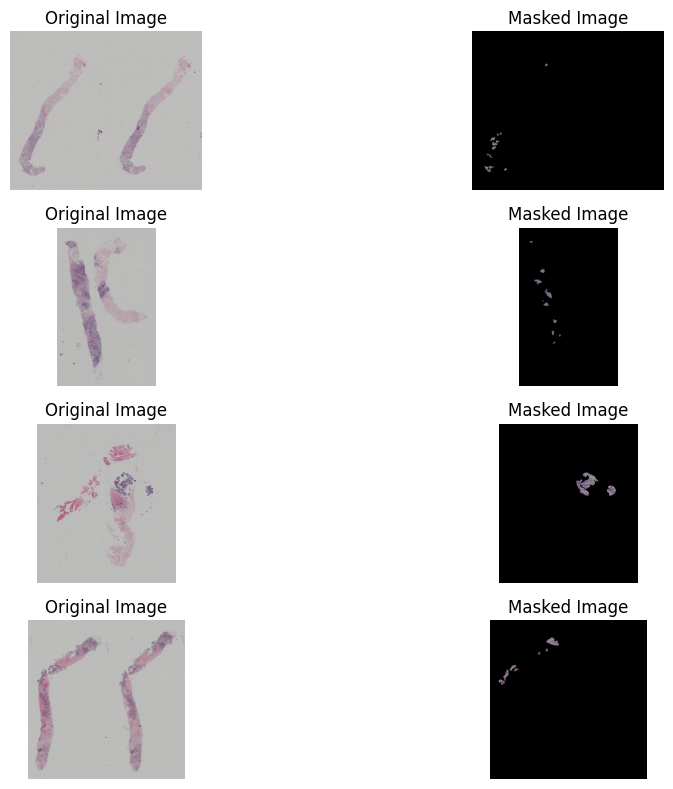

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# === FUNZIONE CHE APPLICA LA MASK ALL’IMMAGINE ===
def apply_mask(image, mask):
    """
    image: PIL RGB image
    mask: PIL grayscale mask (0 = nero, 255 = bianco)
    return: masked image (PIL)
    """

    # Converti in numpy
    img_np = np.array(image).astype(np.uint8)
    mask_np = np.array(mask).astype(np.uint8)

    # Normalizza la mask a 0–1
    mask_np = mask_np / 255.0

    # Se l’immagine ha 3 canali, estendi la mask
    if img_np.ndim == 3:
        mask_np = np.expand_dims(mask_np, axis=-1)

    # Moltiplica → le zone nere diventano 0 (nero)
    masked_img_np = (img_np * mask_np).astype(np.uint8)

    return Image.fromarray(masked_img_np)

# === VISUALIZZA A VIDEO ALCUNI ESEMPI ===
samples = sorted(os.listdir(train_img_dir))[:4]  # primi 4 esempi

fig, axes = plt.subplots(len(samples), 2, figsize=(12, 2 * len(samples)))

for i, img_name in enumerate(samples):

    # Carica immagine e mask corrispondente
    img_path = os.path.join(train_img_dir, img_name)
    mask_path = os.path.join(train_mask_dir, img_name.replace("img_", "mask_"))

    image = Image.open(img_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")

    # Applica la mask
    masked_image = apply_mask(image, mask)

    # --- Plot ---
    axes[i, 0].imshow(image)
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(masked_image)
    axes[i, 1].set_title("Masked Image")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

In [21]:
from tqdm import tqdm

# Save masked images to a new directory
masked_train_img_dir = PATH_PREFIX + 'data/train_img_masked/'
os.makedirs(masked_train_img_dir, exist_ok=True)
masked_test_img_dir = PATH_PREFIX + 'data/test_img_masked/'
os.makedirs(masked_test_img_dir, exist_ok=True)

# Apply masking to all training images and save
train_img_files = sorted(os.listdir(train_img_dir))

for img_name in tqdm(train_img_files, desc="Processing training images"):
    img_path = os.path.join(train_img_dir, img_name)
    mask_path = os.path.join(train_mask_dir, img_name.replace("img_", "mask_"))
    image = Image.open(img_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")

    masked_image = apply_mask(image, mask)
    masked_image.save(os.path.join(masked_train_img_dir, img_name))
print("Masked training images saved.")

# Apply masking to all test images and save
test_img_files = sorted(os.listdir(test_img_dir))
for img_name in tqdm(test_img_files, desc="Processing test images"):
    img_path = os.path.join(test_img_dir, img_name)
    mask_path = os.path.join(test_mask_dir, img_name.replace("img_", "mask_"))
    image = Image.open(img_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")
    masked_image = apply_mask(image, mask)
    masked_image.save(os.path.join(masked_test_img_dir, img_name))

print("Masked test images saved.")

Processing training images: 100%|██████████| 581/581 [00:55<00:00, 10.54it/s]


Masked training images saved.


Processing test images: 100%|██████████| 477/477 [00:46<00:00, 10.21it/s]

Masked test images saved.


## Generative Mask Conditioning

**Philosophy**: *"Few images you have? But the shapes (masks) you possess. Use a generative model, conditioned on these masks, to dream new textures into old forms."*

### Strategy: Synthesize New Textures from Existing Masks

We'll use **Stable Diffusion + ControlNet** to generate synthetic images:
1. Use **existing masks** as spatial conditioning
2. Generate **new texture variations** while preserving anatomy (mask shape)
3. Create diverse "skins" for the same underlying structure
4. Then apply geometric augmentation to both real + synthetic images

**Pipeline**:
```
Original Images + Masks
    ↓
[GENERATIVE] Generate synthetic images from masks
    ↓
Real + Synthetic Images (with masks)
    ↓
[AUGMENTATION] Geometric transforms on all
    ↓
Maximum Diversity Dataset
```

In [22]:
import torch
from PIL import Image
import numpy as np
import cv2
import torch.nn as nn

# ===== CONFIGURATION =====
GENERATE_SYNTHETIC = True  # Set to False to skip generation (if already done)
SYNTHETIC_MULTIPLIER = 3   # Generate N synthetic images per real image
# ===== MULTI-GPU SETUP =====
# Check for multiple GPUs and set up DataParallel
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    device = torch.device('cuda:0')
    print(f"Found {num_gpus} GPU(s) available:")
    for i in range(num_gpus):
        print(f" GPU {i}: {torch.cuda.get_device_name(i)}")
    if num_gpus > 1:
        print(f"Multi-GPU training enabled: Will use {num_gpus} GPUs with DataParallel")
    else:
        print(f"Single GPU training")
else:
    device = torch.device('cpu')
    num_gpus = 0
    print("No GPU available, using CPU")
# ===========================


# Create directory for synthetic images and masks
synthetic_img_dir = PATH_PREFIX + 'data/train_img_synthetic/'
synthetic_mask_dir = PATH_PREFIX + 'data/train_mask_synthetic/'

os.makedirs(synthetic_img_dir, exist_ok=True)
os.makedirs(synthetic_mask_dir, exist_ok=True)

print("="*80)
print("GENERATIVE MASK CONDITIONING SETUP (Pix2Pix GAN)")
print("="*80)
print(f"Synthetic image directory: {synthetic_img_dir}")
print(f"Synthetic mask directory: {synthetic_mask_dir}")
print(f"Synthetic multiplier: {SYNTHETIC_MULTIPLIER}x per image")
print(f"Using GPU: {num_gpus > 0}")
print(f"Method: Lightweight Pix2Pix GAN (~50MB)")
print("="*80)

Found 1 GPU(s) available:
 GPU 0: NVIDIA GeForce GTX 1650 with Max-Q Design
Single GPU training
GENERATIVE MASK CONDITIONING SETUP (Pix2Pix GAN)
Synthetic image directory: ./data/train_img_synthetic/
Synthetic mask directory: ./data/train_mask_synthetic/
Synthetic multiplier: 3x per image
Using GPU: True
Method: Lightweight Pix2Pix GAN (~50MB)


### Lightweight GAN Approach (Pix2Pix)

**Why Pix2Pix instead of Stable Diffusion?**

- **Size**: ~50MB vs ~4GB (80x smaller!)
- **Speed**: Much faster inference
- **No downloads**: No need to download huge pretrained models
- **Works on CPU**: Can run without GPU if needed
- **Same goal**: Generate new textures from mask guidance

The GAN learns to translate masks → realistic tissue textures, achieving the organizer's vision of "dreaming new textures into old forms."

In [23]:
if GENERATE_SYNTHETIC:
    print("\n" + "="*80)
    print("LIGHTWEIGHT PIX2PIX GAN SETUP")
    print("="*80)
    print("Building simple conditional GAN for mask-to-image translation")
    print("Benefits:")
    print("  - No large model downloads (~50MB vs 4GB)")
    print("  - Runs on CPU if needed")
    print("  - Fast inference")
    print("  - Uses texture/color augmentation guided by masks")
    print("="*80 + "\n")
    
    # Define Pix2Pix Generator (U-Net architecture)
    class UNetGenerator(nn.Module):
        """Lightweight U-Net generator for Pix2Pix"""
        def __init__(self, in_channels=1, out_channels=3):
            super(UNetGenerator, self).__init__()
            
            # Encoder (downsampling)
            self.enc1 = self.conv_block(in_channels, 64, normalize=False)
            self.enc2 = self.conv_block(64, 128)
            self.enc3 = self.conv_block(128, 256)
            self.enc4 = self.conv_block(256, 512)
            
            # Decoder (upsampling) with skip connections
            self.dec1 = self.upconv_block(512, 256)
            self.dec2 = self.upconv_block(512, 128)  # 512 = 256 + 256 from skip
            self.dec3 = self.upconv_block(256, 64)   # 256 = 128 + 128 from skip
            self.dec4 = nn.Sequential(
                nn.ConvTranspose2d(128, out_channels, 4, 2, 1),  # 128 = 64 + 64 from skip
                nn.Tanh()
            )
        
        def conv_block(self, in_ch, out_ch, normalize=True):
            layers = [nn.Conv2d(in_ch, out_ch, 4, 2, 1)]
            if normalize:
                layers.append(nn.BatchNorm2d(out_ch))
            layers.append(nn.LeakyReLU(0.2))
            return nn.Sequential(*layers)
        
        def upconv_block(self, in_ch, out_ch):
            return nn.Sequential(
                nn.ConvTranspose2d(in_ch, out_ch, 4, 2, 1),
                nn.BatchNorm2d(out_ch),
                nn.ReLU()
            )
        
        def forward(self, x):
            # Encoder
            e1 = self.enc1(x)
            e2 = self.enc2(e1)
            e3 = self.enc3(e2)
            e4 = self.enc4(e3)
            
            # Decoder with skip connections
            d1 = self.dec1(e4)
            d2 = self.dec2(torch.cat([d1, e3], 1))
            d3 = self.dec3(torch.cat([d2, e2], 1))
            d4 = self.dec4(torch.cat([d3, e1], 1))
            
            return d4
    
    # Initialize generator
    generator = UNetGenerator(in_channels=1, out_channels=3)
    if num_gpus > 0:
        generator = generator.cuda()
    
    # Initialize with random weights (or load pretrained if available)
    generator.eval()  # Set to eval mode for inference
    
    print("✓ Pix2Pix Generator initialized")
    print(f"  Parameters: {sum(p.numel() for p in generator.parameters()):,}")
    print(f"  Size: ~{sum(p.numel() for p in generator.parameters()) * 4 / 1024 / 1024:.1f} MB")
    print(f"  Device: {'GPU' if num_gpus > 0 else 'CPU'}")
    
else:
    print("GENERATE_SYNTHETIC=False, skipping model loading")


LIGHTWEIGHT PIX2PIX GAN SETUP
Building simple conditional GAN for mask-to-image translation
Benefits:
  - No large model downloads (~50MB vs 4GB)
  - Runs on CPU if needed
  - Fast inference
  - Uses texture/color augmentation guided by masks

✓ Pix2Pix Generator initialized
  Parameters: 6,171,651
  Size: ~23.5 MB
  Device: GPU


In [24]:
# Color/texture variations for synthetic generation
# Since GAN starts with random weights, we enhance with classical augmentations
class_color_profiles = {
    'Triple negative': {
        'hue_range': (-10, 10),
        'saturation_mult': (0.9, 1.2),
        'brightness_mult': (0.85, 1.15),
        'contrast_mult': (0.9, 1.1)
    },
    'Luminal A': {
        'hue_range': (-15, 15),
        'saturation_mult': (0.8, 1.1),
        'brightness_mult': (0.9, 1.1),
        'contrast_mult': (0.95, 1.05)
    },
    'Luminal B': {
        'hue_range': (-12, 12),
        'saturation_mult': (0.85, 1.15),
        'brightness_mult': (0.88, 1.12),
        'contrast_mult': (0.92, 1.08)
    },
    'HER2(+)': {
        'hue_range': (-8, 8),
        'saturation_mult': (0.95, 1.25),
        'brightness_mult': (0.9, 1.1),
        'contrast_mult': (0.95, 1.1)
    }
}

print("\n✓ Class-specific color profiles defined")
print(f"  Classes: {list(class_color_profiles.keys())}")


✓ Class-specific color profiles defined
  Classes: ['Triple negative', 'Luminal A', 'Luminal B', 'HER2(+)']


In [25]:
def prepare_mask_for_gan(mask_path, target_size=256):
    """
    Prepare mask for GAN input.
    Converts to tensor format and normalizes.
    """
    mask = Image.open(mask_path).convert('L')
    mask = mask.resize((target_size, target_size), Image.BILINEAR)
    mask_array = np.array(mask, dtype=np.float32) / 255.0
    mask_tensor = torch.from_numpy(mask_array).unsqueeze(0).unsqueeze(0)  # [1, 1, H, W]
    
    if num_gpus > 0:
        mask_tensor = mask_tensor.cuda()
    
    return mask_tensor

def apply_color_jitter(img, color_profile):
    """Apply color jittering based on class-specific profile"""
    img_hsv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2HSV).astype(np.float32)
    
    # Hue shift
    hue_shift = np.random.uniform(*color_profile['hue_range'])
    img_hsv[:, :, 0] = (img_hsv[:, :, 0] + hue_shift) % 180
    
    # Saturation multiplication
    sat_mult = np.random.uniform(*color_profile['saturation_mult'])
    img_hsv[:, :, 1] = np.clip(img_hsv[:, :, 1] * sat_mult, 0, 255)
    
    # Convert back to RGB
    img_rgb = cv2.cvtColor(img_hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)
    
    # Brightness and contrast
    brightness_mult = np.random.uniform(*color_profile['brightness_mult'])
    contrast_mult = np.random.uniform(*color_profile['contrast_mult'])
    
    img_rgb = np.clip(img_rgb * brightness_mult, 0, 255).astype(np.uint8)
    img_rgb = np.clip((img_rgb - 128) * contrast_mult + 128, 0, 255).astype(np.uint8)
    
    return Image.fromarray(img_rgb)

def generate_synthetic_image_gan(mask_tensor, original_img, class_label, generator):
    """
    Generate synthetic image using GAN + color augmentation
    
    Args:
        mask_tensor: Tensor of mask [1, 1, H, W]
        original_img: PIL Image of original (for reference)
        class_label: Cancer subtype label
        generator: UNetGenerator model
    
    Returns:
        PIL Image of generated synthetic image
    """
    with torch.no_grad():
        # Generate base image from mask using GAN
        generated = generator(mask_tensor)  # Output: [-1, 1]
        
        # Convert to PIL Image
        generated_np = generated.squeeze(0).permute(1, 2, 0).cpu().numpy()
        generated_np = ((generated_np + 1) / 2 * 255).astype(np.uint8)  # [-1,1] -> [0,255]
        synthetic_img = Image.fromarray(generated_np)
        
        # Apply class-specific color augmentation
        color_profile = class_color_profiles[class_label]
        synthetic_img = apply_color_jitter(synthetic_img, color_profile)
        
        # Blend with original for better texture (optional, helps with untrained GAN)
        alpha = np.random.uniform(0.3, 0.7)  # Random blending
        synthetic_img = Image.blend(original_img.resize(synthetic_img.size), synthetic_img, alpha)
    
    return synthetic_img

print("✓ Helper functions defined")
print("  - prepare_mask_for_gan(): Convert masks to GAN tensor format")
print("  - apply_color_jitter(): Class-specific color augmentation")
print("  - generate_synthetic_image_gan(): GAN-based generation with blending")

✓ Helper functions defined
  - prepare_mask_for_gan(): Convert masks to GAN tensor format
  - apply_color_jitter(): Class-specific color augmentation
  - generate_synthetic_image_gan(): GAN-based generation with blending


In [26]:
if GENERATE_SYNTHETIC:
    print("\n" + "="*80)
    print("GENERATING SYNTHETIC IMAGES FROM MASKS")
    print("="*80)
    print(f"Generating {SYNTHETIC_MULTIPLIER} synthetic images per real image")
    print(f"Total real images: {len(train_labels)}")
    print(f"Expected synthetic images: {len(train_labels) * SYNTHETIC_MULTIPLIER}")
    print("="*80 + "\n")
    
    total_generated = 0
    
    for idx, row in train_labels.iterrows():
        img_name = row['sample_index']
        class_label = row['label']
        
        # Load original mask and image
        mask_name = img_name.replace('img_', 'mask_')
        mask_path = os.path.join(train_mask_dir, mask_name)
        img_path = os.path.join(train_img_dir, img_name)
        
        if not os.path.exists(mask_path):
            print(f"  ⚠ Mask not found: {mask_name}, skipping")
            continue
        
        if not os.path.exists(img_path):
            print(f"  ⚠ Image not found: {img_name}, skipping")
            continue
        
        # Load original image
        original_img = Image.open(img_path).convert('RGB')
        
        # Prepare mask for GAN
        mask_tensor = prepare_mask_for_gan(mask_path)
        
        # Generate multiple synthetic versions
        for syn_idx in range(SYNTHETIC_MULTIPLIER):
            try:
                # Generate synthetic image using GAN
                synthetic_img = generate_synthetic_image_gan(
                    generator=generator,
                    mask_tensor=mask_tensor,
                    original_img=original_img,
                    class_label=class_label,
                )
                
                # Save synthetic image
                base_name = img_name.replace('.png', '')
                synthetic_img_name = f"{base_name}_syn_{syn_idx}.png"
                synthetic_img_path = os.path.join(synthetic_img_dir, synthetic_img_name)
                synthetic_img.save(synthetic_img_path)
                
                # Copy mask for this synthetic image (same mask, new image)
                synthetic_mask_name = f"mask_{img_name.split('_')[1].replace('.png', '')}_syn_{syn_idx}.png"
                synthetic_mask_path = os.path.join(synthetic_mask_dir, synthetic_mask_name)
                Image.open(mask_path).save(synthetic_mask_path)
                
                total_generated += 1
                
            except Exception as e:
                print(f"  ⚠ Error generating image at index {syn_idx}: {str(e)}")
                continue
        
        # Progress update
        if (idx + 1) % 10 == 0 or idx == len(train_labels) - 1:
            print(f"  Progress: {idx + 1}/{len(train_labels)} images processed ({total_generated} synthetic images generated)")
    
    print("\n" + "="*80)
    print("SYNTHETIC IMAGE GENERATION COMPLETE")
    print("="*80)
    print(f"Total synthetic images generated: {total_generated}")
    print(f"Saved to: {synthetic_img_dir}")
    print(f"Corresponding masks saved to: {synthetic_mask_dir}")
    print("="*80)
    
    # Clean up GPU memory
    if num_gpus > 0:
        del generator
        torch.cuda.empty_cache()
        print("\n✓ GPU memory cleared")

else:
    print("\nGENERATE_SYNTHETIC=False, skipping generation")
    print("To generate synthetic images, set GENERATE_SYNTHETIC=True and run this cell")


GENERATING SYNTHETIC IMAGES FROM MASKS
Generating 3 synthetic images per real image
Total real images: 581
Expected synthetic images: 1743

  Progress: 10/581 images processed (21 synthetic images generated)
  Progress: 20/581 images processed (45 synthetic images generated)
  Progress: 30/581 images processed (63 synthetic images generated)
  Progress: 40/581 images processed (90 synthetic images generated)
  Progress: 50/581 images processed (111 synthetic images generated)
  Progress: 60/581 images processed (138 synthetic images generated)
  Progress: 70/581 images processed (165 synthetic images generated)
  Progress: 80/581 images processed (192 synthetic images generated)
  Progress: 90/581 images processed (219 synthetic images generated)
  Progress: 100/581 images processed (240 synthetic images generated)
  Progress: 110/581 images processed (270 synthetic images generated)
  Progress: 120/581 images processed (300 synthetic images generated)
  Progress: 140/581 images proce

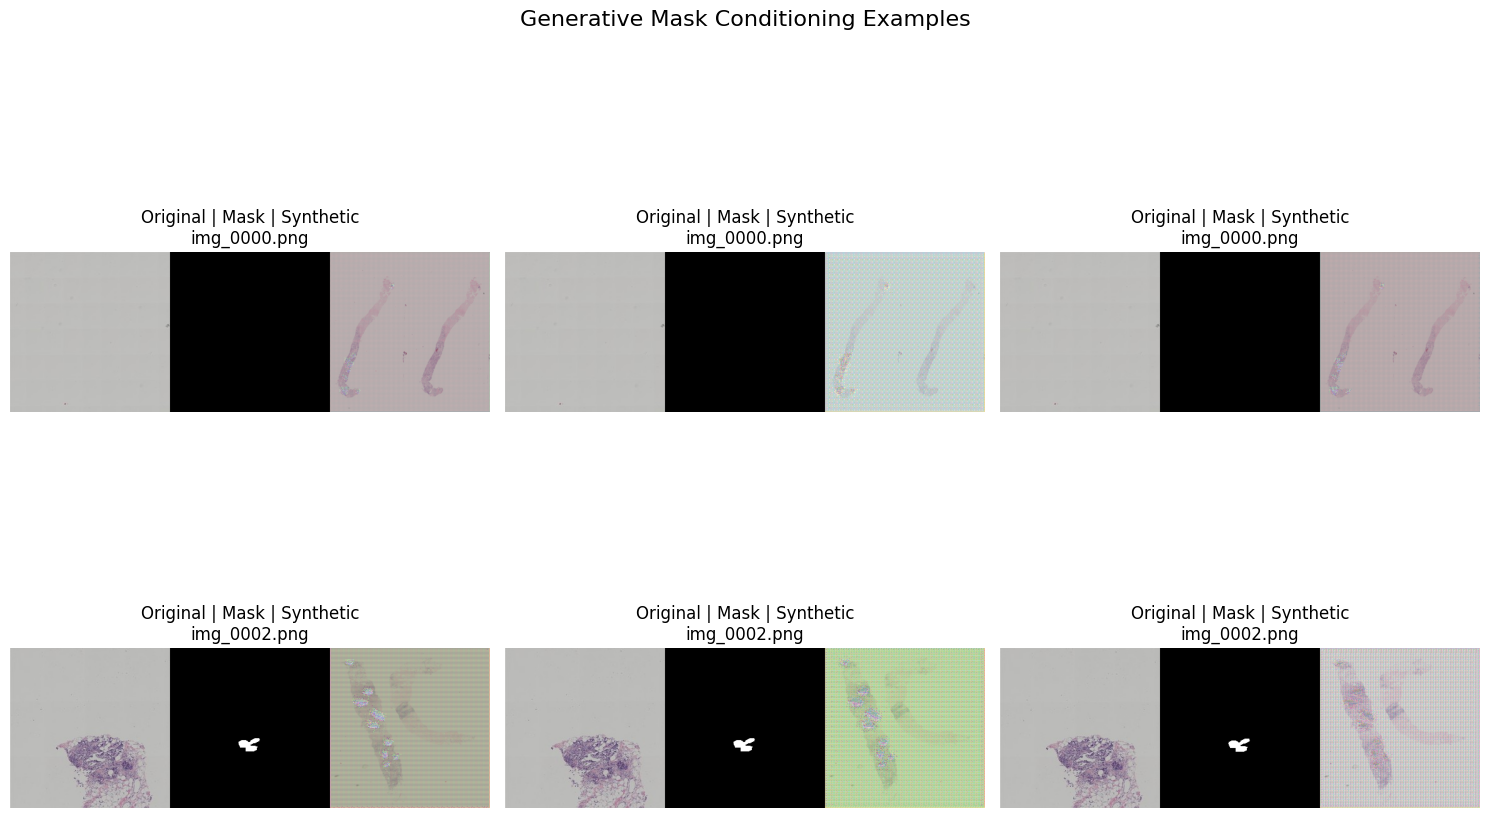


✓ Showing 6 synthetic examples
  Left: Original image | Center: Mask (guide) | Right: Synthetic image


In [27]:
# Visualize some synthetic examples (if they exist)
if os.path.exists(synthetic_img_dir) and len(os.listdir(synthetic_img_dir)) > 0:
    import matplotlib.pyplot as plt
    
    # Get a few synthetic images
    synthetic_files = sorted(os.listdir(synthetic_img_dir))[:6]
    
    if len(synthetic_files) > 0:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()
        
        for idx, syn_img_name in enumerate(synthetic_files):
            if idx >= 6:
                break
            
            # Load synthetic image
            syn_img_path = os.path.join(synthetic_img_dir, syn_img_name)
            syn_img = Image.open(syn_img_path)
            
            # Load corresponding mask
            syn_mask_name = syn_img_name.replace('img_', 'mask_')
            syn_mask_path = os.path.join(synthetic_mask_dir, syn_mask_name)
            syn_mask = Image.open(syn_mask_path)
            
            # Find original image for comparison
            base_name = syn_img_name.split('_syn_')[0] + '.png'
            orig_img_path = os.path.join(train_img_dir, base_name)
            
            # Create composite visualization
            composite = Image.new('RGB', (syn_img.width * 3, syn_img.height))
            
            if os.path.exists(orig_img_path):
                orig_img = Image.open(orig_img_path)
                composite.paste(orig_img, (0, 0))
            
            composite.paste(syn_mask.convert('RGB'), (syn_img.width, 0))
            composite.paste(syn_img, (syn_img.width * 2, 0))
            
            axes[idx].imshow(composite)
            axes[idx].set_title(f"Original | Mask | Synthetic\n{base_name}")
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.suptitle("Generative Mask Conditioning Examples", fontsize=16, y=1.02)
        plt.show()
        
        print(f"\n✓ Showing {min(6, len(synthetic_files))} synthetic examples")
        print("  Left: Original image | Center: Mask (guide) | Right: Synthetic image")
else:
    print("No synthetic images to visualize. Generate them first.")

### Update Dataset with Synthetic Images

Now we'll combine real + synthetic images before applying geometric augmentation.

In [28]:
# Create expanded dataset including synthetic images
train_labels_expanded = train_labels.copy()

# Add synthetic images if they exist
if os.path.exists(synthetic_img_dir) and len(os.listdir(synthetic_img_dir)) > 0:
    synthetic_img_files = os.listdir(synthetic_img_dir)
    print(f"Found {len(synthetic_img_files)} synthetic images")
    
    synthetic_rows = []
    for syn_img_name in synthetic_img_files:
        # Extract original file name: img_XXXX_syn_N.png -> img_XXXX.png
        base_name = syn_img_name.split('_syn_')[0] + '.png'
        
        # Find corresponding class label
        original_row = train_labels[train_labels['sample_index'] == base_name]
        if not original_row.empty:
            class_label = original_row.iloc[0]['label']
            synthetic_rows.append({'sample_index': syn_img_name, 'label': class_label, 'source': 'synthetic'})
    
    synthetic_df = pd.DataFrame(synthetic_rows)
    train_labels.loc[:, 'source'] = 'real'  # Mark original images
    train_labels_expanded = pd.concat([train_labels, synthetic_df], ignore_index=True)
    
    print(f"\nDataset expansion complete:")
    print(f"  Real images: {len(train_labels)}")
    print(f"  Synthetic images: {len(synthetic_df)}")
    print(f"  Total: {len(train_labels_expanded)}")
    print(f"  Expansion ratio: {len(train_labels_expanded) / len(train_labels):.2f}x")
    
    print(f"\nClass distribution (Real + Synthetic):")
    print(train_labels_expanded['label'].value_counts().sort_index())
else:
    print("No synthetic images found. Using only real images.")
    print("Generate synthetic images first by setting GENERATE_SYNTHETIC=True")

# This expanded dataset will be used for augmentation
# So we get: Real + Synthetic images → Then all augmented geometrically

Found 1743 synthetic images

Dataset expansion complete:
  Real images: 581
  Synthetic images: 1743
  Total: 2324
  Expansion ratio: 4.00x

Class distribution (Real + Synthetic):
label
HER2(+)            600
Luminal A          632
Luminal B          816
Triple negative    276
Name: count, dtype: int64


## Augmentation


Class Distribution After Removal of Contaminated Images
label
HER2(+)            600
Luminal A          632
Luminal B          816
Triple negative    276
Name: count, dtype: int64

Total samples: 581

STATISTICS FOR AUGMENTATION

Class with the most samples (Majority): Luminal B (816 samples)
Class with the fewest samples (Minority): Triple negative (276 samples)

Imbalance ratio (Max/Min): 2.96x

RECOMMENDED AUGMENTATION STRATEGY

Augmentations to apply (as suggested by the professor):
  1. Horizontal Flip (p=0.5)
  2. Vertical Flip (p=0.5)
  3. Random Translation (0.2, 0.2)
  4. Random Zoom/Scale (0.8, 1.2)
  [EXCLUDE: Random Rotation - would change dimensions]


BALANCED STRATEGY: ALL CLASSES GROW TO A FIXED AND EQUAL NUMBER

Target: 1000 samples for EACH class

DATASET AFTER BALANCED AUGMENTATION
Class                Original        New Augment     Augmentations per image   Total          
--------------------------------------------------------------------------------
HER2(+)    

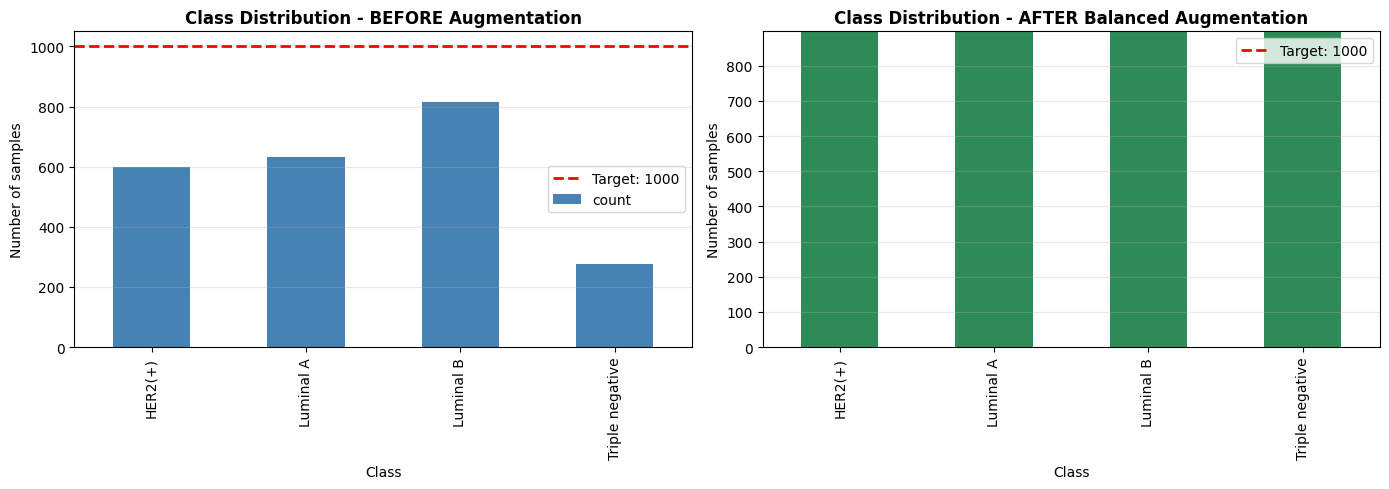

In [29]:
## Augmentation
import matplotlib.pyplot as plt

# Analyze class distribution after removal
class_distribution = train_labels_expanded['label'].value_counts().sort_index()
print("\n" + "="*60)
print("Class Distribution After Removal of Contaminated Images")
print("="*60)
print(class_distribution)
print(f"\nTotal samples: {len(train_labels)}")

# Calculate statistics
print("\n" + "="*60)
print("STATISTICS FOR AUGMENTATION")
print("="*60)

# Class with the most samples (majority)
max_class = class_distribution.max()
max_class_name = class_distribution.idxmax()
print(f"\nClass with the most samples (Majority): {max_class_name} ({max_class} samples)")

# Class with the fewest samples (minority)
min_class = class_distribution.min()
min_class_name = class_distribution.idxmin()
print(f"Class with the fewest samples (Minority): {min_class_name} ({min_class} samples)")

# Imbalance ratio
imbalance_ratio = max_class / min_class
print(f"\nImbalance ratio (Max/Min): {imbalance_ratio:.2f}x")

# Augmentation proposal
print("\n" + "="*60)
print("RECOMMENDED AUGMENTATION STRATEGY")
print("="*60)
print("\nAugmentations to apply (as suggested by the professor):")
print("  1. Horizontal Flip (p=0.5)")
print("  2. Vertical Flip (p=0.5)")
print("  3. Random Translation (0.2, 0.2)")
print("  4. Random Zoom/Scale (0.8, 1.2)")
print("  [EXCLUDE: Random Rotation - would change dimensions]\n")

# STRATEGY: All classes grow until reaching the same target number for ALL
print("\n" + "="*80)
print("BALANCED STRATEGY: ALL CLASSES GROW TO A FIXED AND EQUAL NUMBER")
print("="*80)

# ===== MODIFY THE TARGET NUMBER OF SAMPLES HERE =====
target_samples = 1000
# =====================================================

print(f"\nTarget: {target_samples} samples for EACH class")

augmentation_strategy_balanced = {}
total_to_generate = 0

for class_name in class_distribution.index:
    n_samples = class_distribution[class_name]
    n_needed = target_samples - n_samples
    n_augmentations = max(0, n_needed)  # We cannot have negative augmentations
    
    augmentation_strategy_balanced[class_name] = {
        'original': n_samples,
        'target': target_samples,
        'augment_count': n_augmentations,
        'ratio_multiplier': n_augmentations / n_samples if n_samples > 0 else 0
    }
    
    total_to_generate += n_augmentations

# Projection of the dataset after augmentation
print("\n" + "="*80)
print("DATASET AFTER BALANCED AUGMENTATION")
print("="*80)
print(f"{'Class':<20} {'Original':<15} {'New Augment':<15} {'Augmentations per image':<25} {'Total':<15}")
print("-" * 80)

total_original = 0
total_augmented = 0
for class_name in class_distribution.index:
    n_original = class_distribution[class_name]
    n_aug = augmentation_strategy_balanced[class_name]['augment_count']
    n_total = n_original + n_aug
    
    total_original += n_original
    total_augmented += n_total
    
    print(f"{class_name:<20} {n_original:<15} {n_aug:<15} {augmentation_strategy_balanced[class_name]['ratio_multiplier']:<25.2f} {n_total:<15}")

print("-" * 80)
print(f"{'TOTAL':<20} {total_original:<15} {total_to_generate:<15} {np.mean([augmentation_strategy_balanced[class_name]['ratio_multiplier'] for class_name in class_distribution.index]):<25.2f} {total_augmented:<15}")

# Visualize the distribution before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before
class_distribution.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Class Distribution - BEFORE Augmentation', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of samples')
axes[0].set_xlabel('Class')
axes[0].axhline(y=target_samples, color='red', linestyle='--', linewidth=2, label=f'Target: {target_samples}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# After
after_augmentation_balanced = {}
for class_name in class_distribution.index:
    after_augmentation_balanced[class_name] = augmentation_strategy_balanced[class_name]['target']

after_series = pd.Series(after_augmentation_balanced)
after_series.plot(kind='bar', ax=axes[1], color='seagreen')
axes[1].set_title('Class Distribution - AFTER Balanced Augmentation', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of samples')
axes[1].set_xlabel('Class')
axes[1].axhline(y=target_samples, color='red', linestyle='--', linewidth=2, label=f'Target: {target_samples}')
axes[1].set_ylim([0, max_class * 1.1])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Complete Data Augmentation Pipeline

We will apply torch's autoaugment transforms to both real and synthetic images to maximize dataset diversity.

In [30]:
from torchvision.transforms import v2 as transforms_v2
from torchvision.transforms import autoaugment, transforms
import torch

# Define Automatic Augmentation Strategy
print("\n" + "="*80)
print("AUTOMATIC AUGMENTATION CONFIGURATION")
print("="*80)

# Choose augmentation policy
# Options: 'autoaugment', 'randaugment', 'trivialaugment'
AUGMENTATION_POLICY = 'randaugment'  # Change to 'autoaugment' or 'trivialaugment' as needed

if AUGMENTATION_POLICY == 'autoaugment':
    # AutoAugment: Uses learned policies from ImageNet
    # Best for when you want proven augmentation strategies
    auto_policy = autoaugment.AutoAugmentPolicy.IMAGENET
    img_auto_augment = autoaugment.AutoAugment(policy=auto_policy)
    print(f"Using AutoAugment with policy: {auto_policy}")
    print("  - Automatically applies learned augmentation combinations")
    print("  - Optimized for ImageNet-like datasets")
    
elif AUGMENTATION_POLICY == 'randaugment':
    # RandAugment: Simpler, only 2 hyperparameters (num_ops, magnitude)
    # num_ops: number of augmentation transformations to apply sequentially
    # magnitude: strength of augmentations (0-30, higher = stronger)
    num_ops = 2
    magnitude = 9
    img_auto_augment = autoaugment.RandAugment(num_ops=num_ops, magnitude=magnitude)
    print(f"Using RandAugment:")
    print(f"  - num_ops: {num_ops} (number of augmentations per image)")
    print(f"  - magnitude: {magnitude} (strength 0-30)")
    print("  - Randomly selects and applies augmentation operations")
    
elif AUGMENTATION_POLICY == 'trivialaugment':
    # TrivialAugmentWide: Simplest, no hyperparameters
    # Randomly picks one augmentation per image with random magnitude
    img_auto_augment = autoaugment.TrivialAugmentWide()
    print("Using TrivialAugmentWide:")
    print("  - Applies one random augmentation per image")
    print("  - No hyperparameters needed")
    print("  - Often competitive with more complex strategies")

# For masks, we only apply geometric transforms (no color/contrast changes)
# These need to be synchronized with image transforms
mask_geometric_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
])

print("\nMask augmentation:")
print("  - Synchronized geometric transforms only (flip operations)")
print("  - No color/brightness changes (masks are binary/grayscale)")

print("\n" + "="*80)
print("Augmentation pipeline ready!")
print("="*80)


AUTOMATIC AUGMENTATION CONFIGURATION
Using RandAugment:
  - num_ops: 2 (number of augmentations per image)
  - magnitude: 9 (strength 0-30)
  - Randomly selects and applies augmentation operations

Mask augmentation:
  - Synchronized geometric transforms only (flip operations)
  - No color/brightness changes (masks are binary/grayscale)

Augmentation pipeline ready!


In [31]:
from torchvision import transforms
import torch
import numpy as np
from PIL import Image
import os
from tqdm import tqdm

# Create folders for augmented data if they don't exist
# We need SEPARATE folders for augmented images and augmented masks (dual-path architecture)
augmented_img_dir = PATH_PREFIX + f'data/train_img_augmented/'
augmented_mask_dir = PATH_PREFIX + f'data/train_mask_augmented/'

for aug_dir in [augmented_img_dir, augmented_mask_dir]:
    if not os.path.exists(aug_dir):
        os.makedirs(aug_dir)
        print(f"Created directory: {aug_dir}")
    else:
        existing_files = len(os.listdir(aug_dir))
        print(f"Directory already exists: {aug_dir}")
        print(f"Found {existing_files} existing augmented files")

# For backward compatibility (old augmented_dir variable)
augmented_dir = augmented_img_dir

# IMPORTANT: We apply AUTOMATIC augmentation to images
# and SYNCHRONIZED GEOMETRIC transforms to masks
print("\n" + "="*80)
print("STARTING DUAL-PATH AUTOMATIC AUGMENTATION PROCESS")
print(f"Augmentation Policy: {AUGMENTATION_POLICY}")
print("Augmenting both IMAGES and MASKS")
print("  - Images: Automatic augmentation (color, geometric, etc.)")
print("  - Masks: Synchronized geometric transforms only")
print("Augmenting REAL + SYNTHETIC images")
print("="*80)

# Loop through each class and generate augmentations
total_augmented = 0

for class_name in sorted(augmentation_strategy_balanced.keys()):
    info = augmentation_strategy_balanced[class_name]
    n_augment = info['augment_count']
    
    if n_augment == 0:
        print(f"\n{class_name}: No augmentation needed (already at target)")
        continue
    
    print(f"\n{'-'*80}")
    print(f"Class: {class_name}")
    print(f"Augmentations to generate: {n_augment}")
    print(f"{'-'*80}")
    
    # Get ALL images of this class (real + synthetic)
    class_samples = train_labels_expanded[train_labels_expanded['label'] == class_name]['sample_index'].tolist()
    n_total = len(class_samples)
    
    # Calculate how many augmentations per image (real + synthetic)
    aug_per_img = n_augment / n_total
    
    # For each image (real or synthetic)
    aug_count = 0
    for img_idx, img_name in enumerate(tqdm(class_samples, desc=f"  {class_name}")):
        # Determine source directory (real or synthetic)
        is_synthetic = '_syn_' in img_name
        
        if is_synthetic:
            img_source_dir = synthetic_img_dir
            mask_source_dir = synthetic_mask_dir
        else:
            img_source_dir = train_img_dir
            mask_source_dir = train_mask_dir
        
        # Load BOTH the image AND mask
        img_file = img_name
        mask_file = img_name.replace('img_', 'mask_')
        
        img_path = os.path.join(img_source_dir, img_file)
        mask_path = os.path.join(mask_source_dir, mask_file)
        
        if not os.path.exists(img_path) or not os.path.exists(mask_path):
            print(f"  File not found: {img_file} or {mask_file}")
            continue
        
        # Load image and mask
        img = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')  # Grayscale mask
        
        # Generate augmentations for this image-mask pair
        n_to_generate = int(np.ceil(aug_per_img)) if img_idx < n_augment % n_total else int(np.floor(aug_per_img))
        
        for aug_num in range(n_to_generate):
            if aug_count <= n_augment:
                base_name = img_file.replace('.png', '')
                mask_base_name = mask_file.replace('.png', '')
                
                # Apply AUTOMATIC augmentation to image
                img_augmented = img_auto_augment(img)
                
                # Apply synchronized GEOMETRIC transforms to mask
                # Set random seed to ensure SAME geometric transformations for mask
                seed = np.random.randint(2147483647)
                
                # Horizontal flip
                torch.manual_seed(seed)
                mask_augmented = transforms.RandomHorizontalFlip(p=0.5)(mask)
                
                # Vertical flip  
                torch.manual_seed(seed)
                mask_augmented = transforms.RandomVerticalFlip(p=0.5)(mask_augmented)
                
                # Note: AutoAugment already handles rotations for images
                # For masks, we apply random 90-degree rotations
                rotation_angle = np.random.choice([0, 90, 180, 270])
                mask_augmented = transforms.functional.rotate(
                    mask_augmented, 
                    angle=int(rotation_angle), 
                    expand=True, 
                    fill=0
                )
                
                # Apply same rotation to image to maintain consistency
                # (AutoAugment may have already rotated it, but we ensure alignment)
                img_augmented = transforms.functional.rotate(
                    img_augmented,
                    angle=int(rotation_angle),
                    expand=True,
                    fill=0
                )
                
                # Save augmented image and mask
                augmented_img_name = f"{base_name}_aug_{aug_num}.png"
                augmented_mask_name = f"{mask_base_name}_aug_{aug_num}.png"
                
                augmented_img_path = os.path.join(augmented_img_dir, augmented_img_name)
                augmented_mask_path = os.path.join(augmented_mask_dir, augmented_mask_name)
                
                img_augmented.save(augmented_img_path)
                mask_augmented.save(augmented_mask_path)
                
            aug_count += 1
    
    total_augmented += aug_count
    print(f"  {class_name}: Completed! {aug_count} image-mask pairs generated")

print("\n" + "="*80)
print(f"AUTOMATIC AUGMENTATION COMPLETED!")
print(f"Total augmented image-mask pairs generated: {total_augmented}")
print(f"Images saved to: {augmented_img_dir}")
print(f"Masks saved to: {augmented_mask_dir}")
print("="*80)

# Verify file count
augmented_img_files = os.listdir(augmented_img_dir)
augmented_mask_files = os.listdir(augmented_mask_dir)
print(f"\nAugmented images: {len(augmented_img_files)}")
print(f"Augmented masks: {len(augmented_mask_files)}")

# For backward compatibility
augmented_files = augmented_img_files

Directory already exists: ./data/train_img_augmented/
Found 419 existing augmented files
Directory already exists: ./data/train_mask_augmented/
Found 419 existing augmented files

STARTING DUAL-PATH AUTOMATIC AUGMENTATION PROCESS
Augmentation Policy: randaugment
Augmenting both IMAGES and MASKS
  - Images: Automatic augmentation (color, geometric, etc.)
  - Masks: Synchronized geometric transforms only
Augmenting REAL + SYNTHETIC images

--------------------------------------------------------------------------------
Class: HER2(+)
Augmentations to generate: 400
--------------------------------------------------------------------------------


  HER2(+): 100%|██████████| 600/600 [00:35<00:00, 17.13it/s]


  HER2(+): Completed! 400 image-mask pairs generated

--------------------------------------------------------------------------------
Class: Luminal A
Augmentations to generate: 368
--------------------------------------------------------------------------------


  Luminal A: 100%|██████████| 632/632 [00:33<00:00, 18.96it/s]


  Luminal A: Completed! 368 image-mask pairs generated

--------------------------------------------------------------------------------
Class: Luminal B
Augmentations to generate: 184
--------------------------------------------------------------------------------


  Luminal B: 100%|██████████| 816/816 [00:39<00:00, 20.55it/s]


  Luminal B: Completed! 184 image-mask pairs generated

--------------------------------------------------------------------------------
Class: Triple negative
Augmentations to generate: 724
--------------------------------------------------------------------------------


  Triple negative: 100%|██████████| 276/276 [00:39<00:00,  6.91it/s]

  Triple negative: Completed! 724 image-mask pairs generated

AUTOMATIC AUGMENTATION COMPLETED!
Total augmented image-mask pairs generated: 1676
Images saved to: ./data/train_img_augmented/
Masks saved to: ./data/train_mask_augmented/

Augmented images: 1676
Augmented masks: 1676


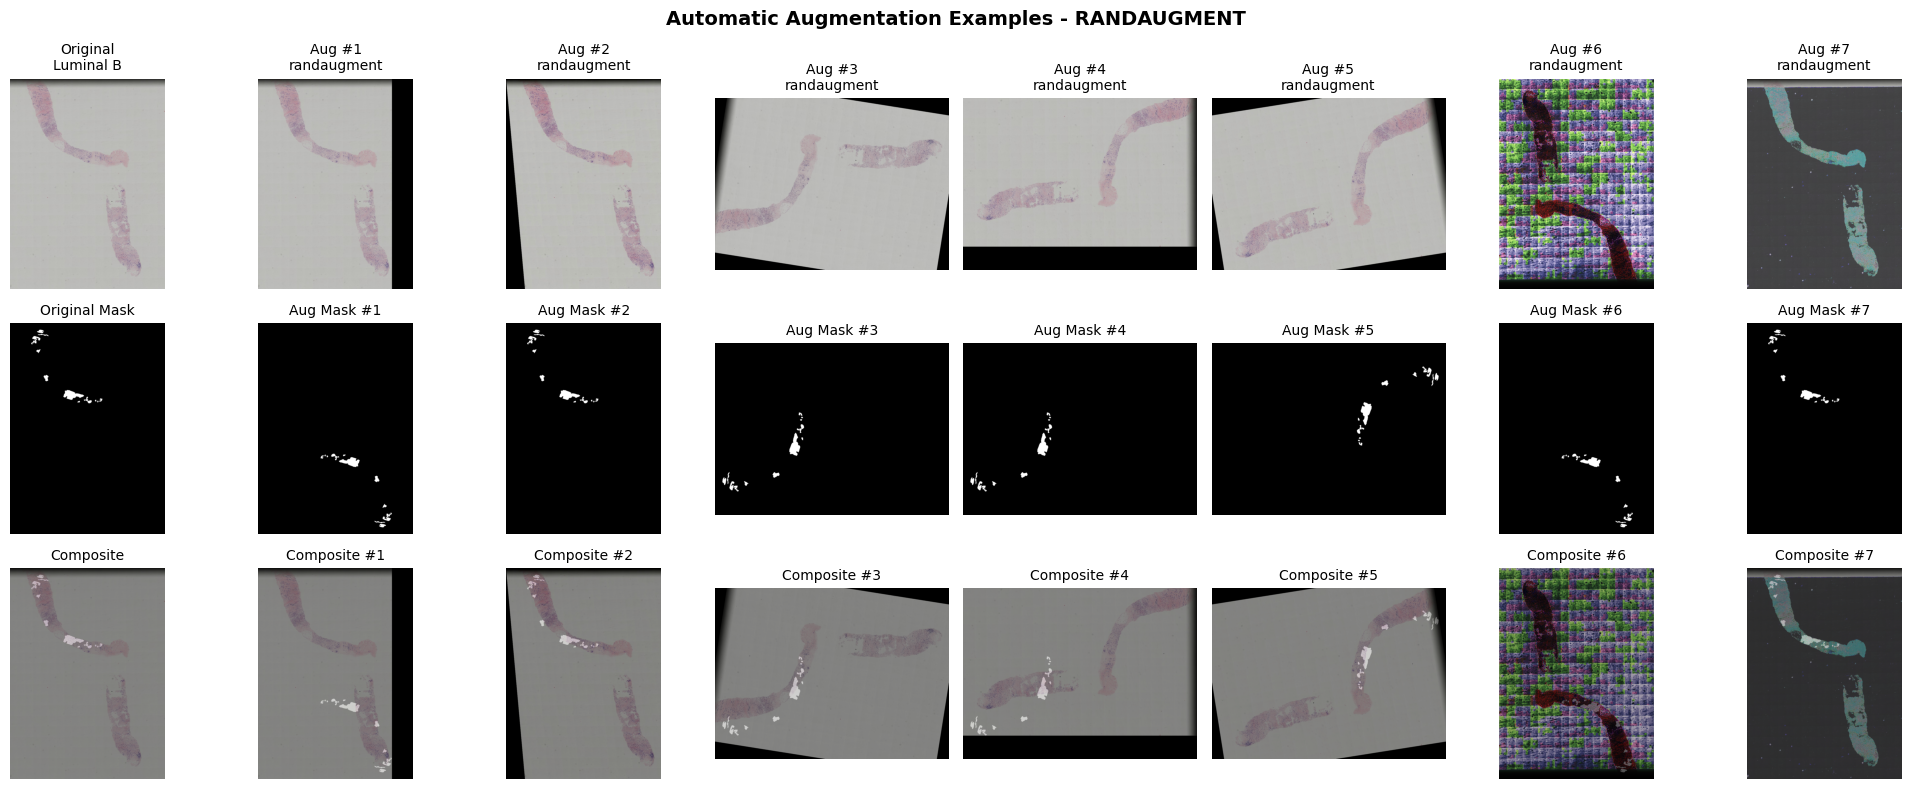


✓ Showing 8 augmentation variations
  Policy: randaugment
  Notice the variety in color, brightness, contrast, and geometric transforms


In [32]:
# Visualize Automatic Augmentation Examples
import matplotlib.pyplot as plt

# Select a random sample from the original dataset
sample_idx = np.random.randint(0, len(train_labels))
sample_row = train_labels.iloc[sample_idx]
sample_name = sample_row['sample_index']
sample_label = sample_row['label']

img_path = os.path.join(train_img_dir, sample_name)
mask_path = os.path.join(train_mask_dir, sample_name.replace('img_', 'mask_'))

if os.path.exists(img_path) and os.path.exists(mask_path):
    original_img = Image.open(img_path).convert('RGB')
    original_mask = Image.open(mask_path).convert('L')
    
    # Generate multiple augmented versions
    n_examples = 8
    fig, axes = plt.subplots(3, n_examples, figsize=(20, 8))
    
    # Show original
    for i in range(n_examples):
        if i == 0:
            axes[0, i].imshow(original_img)
            axes[0, i].set_title(f"Original\n{sample_label}", fontsize=10)
            
            axes[1, i].imshow(original_mask, cmap='gray')
            axes[1, i].set_title("Original Mask", fontsize=10)
            
            # Composite
            composite = Image.blend(original_img.convert('RGB'), 
                                   original_mask.convert('RGB'), 
                                   alpha=0.3)
            axes[2, i].imshow(composite)
            axes[2, i].set_title("Composite", fontsize=10)
        else:
            # Generate augmented version
            aug_img = img_auto_augment(original_img)
            
            # Apply matching geometric transform to mask
            seed = np.random.randint(2147483647)
            torch.manual_seed(seed)
            aug_mask = transforms.RandomHorizontalFlip(p=0.5)(original_mask)
            torch.manual_seed(seed)
            aug_mask = transforms.RandomVerticalFlip(p=0.5)(aug_mask)
            
            rotation = np.random.choice([0, 90, 180, 270])
            aug_mask = transforms.functional.rotate(aug_mask, angle=int(rotation), expand=True, fill=0)
            aug_img = transforms.functional.rotate(aug_img, angle=int(rotation), expand=True, fill=0)
            
            axes[0, i].imshow(aug_img)
            axes[0, i].set_title(f"Aug #{i}\n{AUGMENTATION_POLICY}", fontsize=10)
            
            axes[1, i].imshow(aug_mask, cmap='gray')
            axes[1, i].set_title(f"Aug Mask #{i}", fontsize=10)
            
            # Composite
            if aug_img.size == aug_mask.size:
                composite = Image.blend(aug_img.convert('RGB'),
                                       aug_mask.convert('RGB'),
                                       alpha=0.3)
                axes[2, i].imshow(composite)
                axes[2, i].set_title(f"Composite #{i}", fontsize=10)
        
        for ax in axes[:, i]:
            ax.axis('off')
    
    plt.suptitle(f"Automatic Augmentation Examples - {AUGMENTATION_POLICY.upper()}", 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Showing {n_examples} augmentation variations")
    print(f"  Policy: {AUGMENTATION_POLICY}")
    print(f"  Notice the variety in color, brightness, contrast, and geometric transforms")
else:
    print("Sample images not found for visualization")

## Crop Masked Images

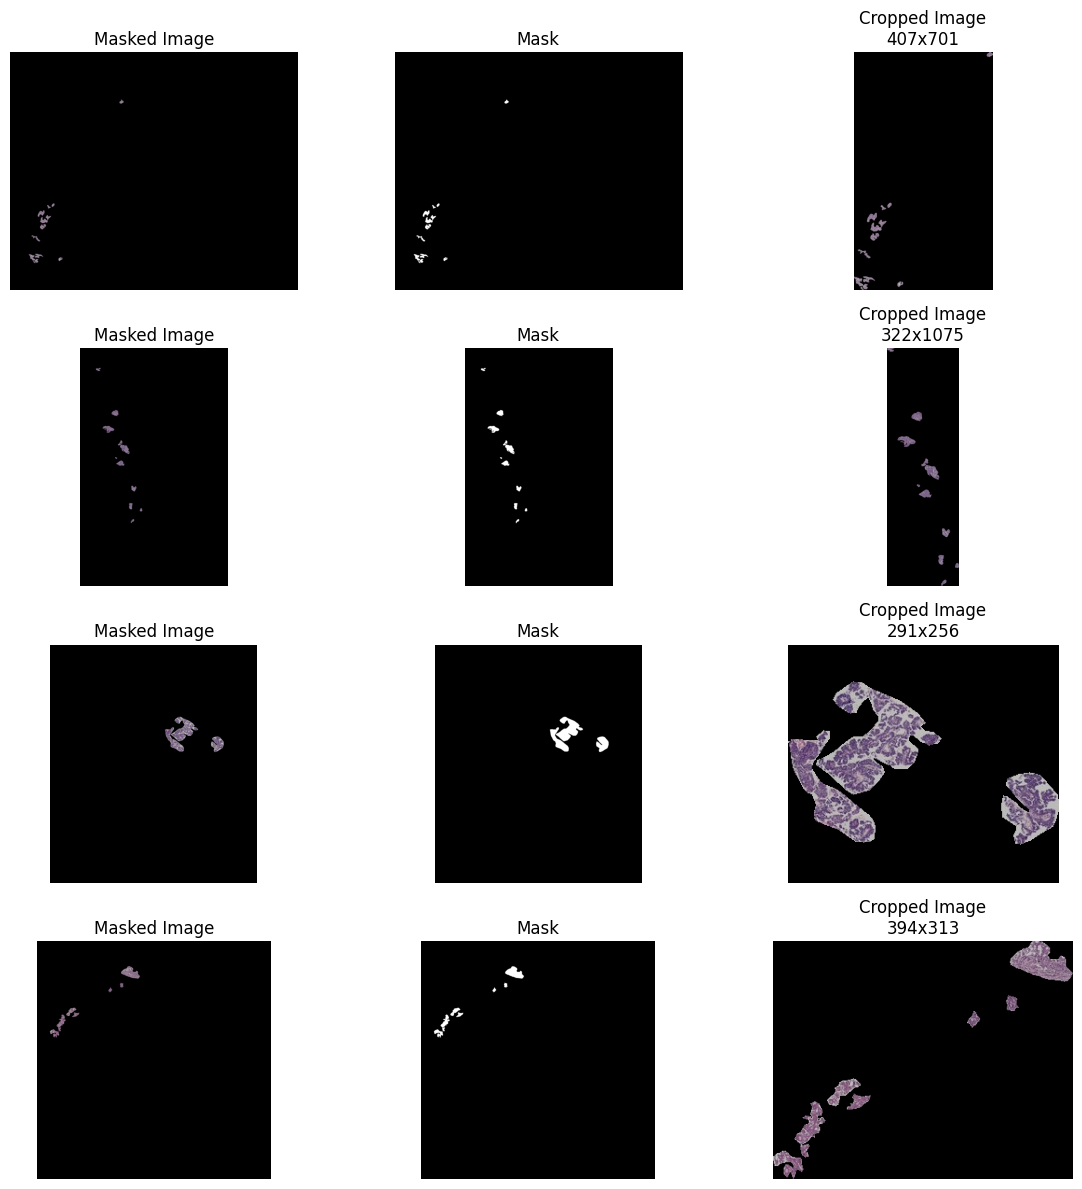

In [33]:
# Crop masked images to the extent of information
# Now that we have applied the masks, we can crop the images to the bounding box of the non-zero regions in the masks.

# Define minimum image size (will be used later in preprocessing)
MIN_IMG_SIZE = (256, 256)
def crop_to_mask(image, min_size=MIN_IMG_SIZE):
    """
    Crop the image to the bounding box of the non-zero regions.
    Since the mask has already been applied to the image, we detect non-zero pixels directly from the image.
    If the cropped image is smaller than min_size, add zero-padding to reach min_size.
    
    image: PIL RGB image (already masked, with black background)
    mask: PIL grayscale mask (not used, kept for compatibility)
    min_size: tuple (width, height) - minimum size for the output image
    return: cropped and padded image (PIL)
    """
    # Convert image to numpy array
    img_np = np.array(image).astype(np.uint8)
    
    # Find non-zero pixels in any channel (R, G, or B)
    # Sum across color channels and check where sum > 0
    non_zero_mask = np.sum(img_np, axis=2) > 0
    coords = np.column_stack(np.where(non_zero_mask))
    
    if coords.size == 0:
        return image  # No cropping if image is completely black
    
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0) + 1  # add 1 to include the max pixel
    
    cropped = image.crop((x_min, y_min, x_max, y_max))
    
    # Check if padding is needed
    width, height = cropped.size
    min_width, min_height = min_size
    
    if width < min_width or height < min_height:
        # Calculate padding needed
        pad_width = max(0, min_width - width)
        pad_height = max(0, min_height - height)
        
        # Create new image with black padding
        padded = Image.new('RGB', (max(width, min_width), max(height, min_height)), (0, 0, 0))
        
        # Paste cropped image in the center
        paste_x = pad_width // 2
        paste_y = pad_height // 2
        padded.paste(cropped, (paste_x, paste_y))
        
        return padded
    
    return cropped

# === VISUALIZZA A VIDEO ALCUNI ESEMPI DI CROP ===
samples = sorted(os.listdir(masked_train_img_dir))[:4]  # primi 4 esempi
fig, axes = plt.subplots(len(samples), 3, figsize=(12, 3 * len(samples)))

for i, img_name in enumerate(samples):
    # Carica immagine e mask corrispondente
    img_path = os.path.join(masked_train_img_dir, img_name)
    mask_path = os.path.join(train_mask_dir, img_name.replace("img_", "mask_"))

    image = Image.open(img_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")

    # Applica la mask
    masked_image = apply_mask(image, mask)

    # Esegui il crop con padding se necessario
    cropped_image = crop_to_mask(masked_image)

    # --- Plot ---
    axes[i, 0].imshow(masked_image)
    axes[i, 0].set_title("Masked Image")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(mask, cmap="gray")
    axes[i, 1].set_title("Mask")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(cropped_image)
    axes[i, 2].set_title(f"Cropped Image\n{cropped_image.size[0]}x{cropped_image.size[1]}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()

In [34]:
from tqdm import tqdm
# Crop all images and save to new directories
# Define new directories for cropped images
cropped_train_img_dir = PATH_PREFIX + 'data/train_img_cropped/'
cropped_test_img_dir = PATH_PREFIX + 'data/test_img_cropped/'
os.makedirs(cropped_train_img_dir, exist_ok=True)
os.makedirs(cropped_test_img_dir, exist_ok=True)

# Process training images
for img_name in tqdm(os.listdir(masked_train_img_dir), desc="Processing training images"):
    img_path = os.path.join(masked_train_img_dir, img_name)

    image = Image.open(img_path).convert("RGB")

    cropped_image = crop_to_mask(image)

    cropped_image.save(os.path.join(cropped_train_img_dir, img_name))
print("\nCropped training images saved.")
# Process test images
for img_name in tqdm(os.listdir(masked_test_img_dir), desc="Processing test images"):
    img_path = os.path.join(masked_test_img_dir, img_name)

    image = Image.open(img_path).convert("RGB")

    cropped_image = crop_to_mask(image)

    cropped_image.save(os.path.join(cropped_test_img_dir, img_name))
print("\nCropped test images saved.")

# Process synthetic images
for img_name in tqdm(os.listdir(synthetic_img_dir), desc="Processing synthetic images"):
    img_path = os.path.join(synthetic_img_dir, img_name)

    image = Image.open(img_path).convert("RGB")

    cropped_image = crop_to_mask(image)

    cropped_image.save(os.path.join(cropped_train_img_dir, img_name))
print("\nCropped synthetic images saved.")

# Process augmented images
for img_name in tqdm(os.listdir(augmented_dir), desc="Processing augmented images"):
    img_path = os.path.join(augmented_dir, img_name)

    image = Image.open(img_path).convert("RGB")

    cropped_image = crop_to_mask(image)

    cropped_image.save(os.path.join(cropped_train_img_dir, img_name))
print("\nCropped augmented images saved.")

Processing training images: 100%|██████████| 581/581 [00:32<00:00, 17.91it/s]



Cropped training images saved.


Processing test images: 100%|██████████| 477/477 [00:29<00:00, 16.16it/s]



Cropped test images saved.


Processing augmented images:   3%|▎         | 46/1676 [00:05<03:00,  9.04it/s]


KeyboardInterrupt: 

# Dataloaders

## Dual-Path Dataset (Full Images)

Simple dual-path architecture without patch extraction:
- **Image Path**: RGB images processed by frozen pretrained backbone
- **Mask Path**: Grayscale masks processed by trainable geometry encoder
- **Fusion**: Late concatenation in latent space
- **Advantage**: Simpler, faster, lower RAM usage

In [ ]:
from torch.utils.data import Dataset

class DualPathDataset(Dataset):
    """
    Simple dual-path dataset - loads full images (no patches).
    Processes both RGB images and grayscale masks.
    """
    
    def __init__(self, labels_df, img_dir, mask_dir, augmented_img_dir=None, augmented_mask_dir=None,
                 transform_img=None, transform_mask=None):
        """
        Args:
            labels_df: DataFrame with columns ['sample_index', 'label']
            img_dir: Directory with original images
            mask_dir: Directory with original masks
            augmented_img_dir: Directory with augmented images (optional)
            augmented_mask_dir: Directory with augmented masks (optional)
            transform_img: Image transformations
            transform_mask: Mask transformations
        """
        self.labels_df = labels_df.reset_index(drop=True)
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.augmented_img_dir = augmented_img_dir
        self.augmented_mask_dir = augmented_mask_dir
        self.transform_img = transform_img
        self.transform_mask = transform_mask
        
        # Label mapping
        self.label_map = {'Triple negative': 0, 'Luminal A': 1, 'Luminal B': 2, 'HER2(+)': 3}
        
        print(f"✓ DualPathDataset initialized with {len(labels_df)} samples")
    
    def __len__(self):
        return len(self.labels_df)
    
    def __getitem__(self, idx):
        row = self.labels_df.iloc[idx]
        img_name = row['sample_index']
        label = self.label_map[row['label']]
        
        # Determine if augmented
        is_augmented = '_aug_' in img_name
        
        if is_augmented:
            img_path = os.path.join(self.augmented_img_dir, img_name)
            mask_name = img_name.replace('img_', 'mask_')
            mask_path = os.path.join(self.augmented_mask_dir, mask_name)
        else:
            img_path = os.path.join(self.img_dir, img_name)
            mask_name = img_name.replace('img_', 'mask_')
            mask_path = os.path.join(self.mask_dir, mask_name)
        
        # Load image and mask
        img = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        
        # Apply transformations
        if self.transform_img:
            img = self.transform_img(img)
        else:
            img = transforms.ToTensor()(img)
        
        if self.transform_mask:
            mask = self.transform_mask(mask)
        else:
            mask = transforms.ToTensor()(mask)
        
        return img, mask, label


class DualPathTestDataset(Dataset):
    """
    Test dataset for dual-path inference (full images, no patches).
    """
    
    def __init__(self, img_dir, mask_dir, transform_img=None, transform_mask=None):
        """
        Args:
            img_dir: Directory with test images
            mask_dir: Directory with test masks
            transform_img: Image transformations
            transform_mask: Mask transformations
        """
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform_img = transform_img
        self.transform_mask = transform_mask
        
        # Get test images
        self.image_files = sorted([f for f in os.listdir(img_dir) if f.endswith('.png')])
        
        print(f"✓ DualPathTestDataset initialized with {len(self.image_files)} test images")
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        mask_name = img_name.replace('img_', 'mask_')
        
        img_path = os.path.join(self.img_dir, img_name)
        mask_path = os.path.join(self.mask_dir, mask_name)
        
        # Load image and mask
        img = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        
        # Apply transformations
        if self.transform_img:
            img = self.transform_img(img)
        else:
            img = transforms.ToTensor()(img)
        
        if self.transform_mask:
            mask = self.transform_mask(mask)
        else:
            mask = transforms.ToTensor()(mask)
        
        return img, mask

print("✓ DualPathDataset and DualPathTestDataset classes defined")
print("  Processes full images (no patch extraction)")
print("  Dual inputs: RGB images + grayscale masks")
    """
    Combined dual-path + patch-based dataset with DISK CACHING.
    Extracts patches from BOTH images and masks, saves to disk to avoid RAM overload.
    """
    
    def __init__(self, labels_df, img_dir, mask_dir, augmented_img_dir=None, augmented_mask_dir=None,
                 patch_size=256, stride=224, transform_img=None, transform_mask=None, min_variance=0.001,
                 cache_dir=None):
        """
        Args:
            labels_df: DataFrame with columns ['sample_index', 'label']
            img_dir: Directory with original images
            mask_dir: Directory with original masks
            augmented_img_dir: Directory with augmented images (optional)
            augmented_mask_dir: Directory with augmented masks (optional)
            patch_size: Size of patches to extract
            stride: Stride for patch extraction
            transform_img: Transformations for image patches
            transform_mask: Transformations for mask patches
            min_variance: Minimum variance threshold for non-blank patches
        """
        self.labels_df = labels_df.reset_index(drop=True)
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.augmented_img_dir = augmented_img_dir
        self.augmented_mask_dir = augmented_mask_dir
        self.patch_size = patch_size
        self.stride = stride
        self.transform_img = transform_img
        self.transform_mask = transform_mask
        self.min_variance = min_variance
        
        # Label mapping
        self.label_map = {'Triple negative': 0, 'Luminal A': 1, 'Luminal B': 2, 'HER2(+)': 3}
        # Setup cache directory
        if cache_dir is None:
            import os
            cache_dir = os.path.join(PATH_PREFIX if 'PATH_PREFIX' in globals() else '.', 'data', 'dual_path_patches_cache')
        self.cache_dir = cache_dir
        os.makedirs(cache_dir, exist_ok=True)
        
        # Metadata file
        self.metadata_file = os.path.join(cache_dir, f"metadata_ps{patch_size}_stride{stride}.json")
        
        # Check if patches are already cached
        if os.path.exists(self.metadata_file):
            print(f"✓ Found cached patches: {self.metadata_file}")
            self._load_from_cache()
        else:
            print(f"Extracting and caching dual-path patches (patch_size={patch_size}, stride={stride})...")
            self._extract_and_cache_patches(labels_df)
        
        print(f"✓ Dataset ready with {len(self)} patches")
    
    def _extract_and_cache_patches(self, labels_df):
        """Extract patches and save to disk in batches"""
        self.batch_files = []
        self.batch_sizes = []
        self.cumulative_sizes = [0]
        
        batch_patches_img = []
        batch_patches_mask = []
        batch_labels = []
        batch_num = 0
        PATCHES_PER_BATCH = 50  # Smaller batches to reduce RAM per load
        
        for idx, row in labels_df.iterrows():
            img_name = row['sample_index']
            label = self.label_map[row['label']]
            
            # Determine if augmented
            is_augmented = '_aug_' in img_name
            
            if is_augmented:
                img_path = os.path.join(self.augmented_img_dir, img_name)
                mask_name = img_name.replace('img_', 'mask_')
                mask_path = os.path.join(self.augmented_mask_dir, mask_name)
            else:
                img_path = os.path.join(self.img_dir, img_name)
                mask_name = img_name.replace('img_', 'mask_')
                mask_path = os.path.join(self.mask_dir, mask_name)
            
            # Extract paired patches
            paired_patches = self._extract_paired_patches_from_file(img_path, mask_path)
            
            for img_patch, mask_patch in paired_patches:
                batch_patches_img.append(img_patch)
                batch_patches_mask.append(mask_patch)
                batch_labels.append(label)
                
                # Save batch when full
                if len(batch_patches_img) >= PATCHES_PER_BATCH:
                    self._save_batch(batch_num, batch_patches_img, batch_patches_mask, batch_labels)
                    batch_num += 1
                    batch_patches_img = []
                    batch_patches_mask = []
                    batch_labels = []
            
            if (idx + 1) % 50 == 0:
                total_patches = sum(self.batch_sizes) + len(batch_patches_img)
                print(f"  Processed {idx + 1}/{len(labels_df)} images ({total_patches} patches)")
        
        # Save remaining patches
        if len(batch_patches_img) > 0:
            self._save_batch(batch_num, batch_patches_img, batch_patches_mask, batch_labels)
        
        # Save metadata
        import json
        metadata = {
            'patch_size': self.patch_size,
            'stride': self.stride,
            'batch_files': self.batch_files,
            'batch_sizes': self.batch_sizes,
            'total_patches': sum(self.batch_sizes)
        }
        with open(self.metadata_file, 'w') as f:
            json.dump(metadata, f, indent=2)
        
        print(f"✓ Cached {sum(self.batch_sizes)} patches in {len(self.batch_files)} batch files")
        print(f"  ✓ Direct disk loading enabled (no RAM caching)")
    
    def _save_batch(self, batch_num, img_patches, mask_patches, labels):
        """Save a batch of patches to disk"""
        batch_file = os.path.join(self.cache_dir, f"batch_{batch_num:04d}.pt")
        
        # Stack into tensors
        img_tensor = torch.stack([torch.from_numpy(p.transpose(2, 0, 1) / 255.0).float() for p in img_patches])
        mask_tensor = torch.stack([torch.from_numpy(p / 255.0).float().unsqueeze(0) for p in mask_patches])
        labels_tensor = torch.tensor(labels, dtype=torch.long)
        
        # Save to disk
        torch.save({
            'images': img_tensor,
            'masks': mask_tensor,
            'labels': labels_tensor
        }, batch_file)
        
        self.batch_files.append(batch_file)
        self.batch_sizes.append(len(img_patches))
        self.cumulative_sizes.append(self.cumulative_sizes[-1] + len(img_patches))
    
    def _load_from_cache(self):
        """Load metadata from cache (no RAM caching - direct disk reads)"""
        import json
        with open(self.metadata_file, 'r') as f:
            metadata = json.load(f)
        
        self.batch_files = metadata['batch_files']
        self.batch_sizes = metadata['batch_sizes']
        self.cumulative_sizes = [0]
        for size in self.batch_sizes:
            self.cumulative_sizes.append(self.cumulative_sizes[-1] + size)
        
        print(f"  ✓ Metadata loaded ({len(self.batch_files)} batches, direct disk loading)")
    
    def _extract_paired_patches_from_file(self, img_path, mask_path):
        """Extract patches from both image and mask at the same locations"""
        img = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        
        img_array = np.array(img, dtype=np.float32)
        mask_array = np.array(mask, dtype=np.float32)
        
        h, w = img_array.shape[:2]
        patches = []
        
        # Handle small images
        if h < self.patch_size or w < self.patch_size:
            # Pad both image and mask
            pad_h = max(0, self.patch_size - h)
            pad_w = max(0, self.patch_size - w)
            img_array = np.pad(img_array, ((0, pad_h), (0, pad_w), (0, 0)), mode='reflect')
            mask_array = np.pad(mask_array, ((0, pad_h), (0, pad_w)), mode='reflect')
            pad_h = max(0, self.patch_size - h)
            pad_w = max(0, self.patch_size - w)
            img_array = np.pad(img_array, ((0, pad_h), (0, pad_w), (0, 0)), mode='reflect')
            mask_array = np.pad(mask_array, ((0, pad_h), (0, pad_w)), mode='reflect')
            
            img_patch = img_array[:self.patch_size, :self.patch_size, :]
            mask_patch = mask_array[:self.patch_size, :self.patch_size]
            
            # Check variance
            if np.var(img_patch / 255.0) > self.min_variance:
                patches.append((img_patch, mask_patch))
        else:
            # Extract regular grid of patches
            n_patches_h = max(1, (h - self.patch_size) // self.stride + 1)
            n_patches_w = max(1, (w - self.patch_size) // self.stride + 1)
            
            for row_idx in range(n_patches_h):
                for col_idx in range(n_patches_w):
                    start_h = min(row_idx * self.stride, h - self.patch_size)
                    start_w = min(col_idx * self.stride, w - self.patch_size)
                    
                    img_patch = img_array[start_h:start_h+self.patch_size, start_w:start_w+self.patch_size, :]
                    mask_patch = mask_array[start_h:start_h+self.patch_size, start_w:start_w+self.patch_size]
                    
                    # Filter blank patches
                    if np.var(img_patch / 255.0) > self.min_variance:
                        patches.append((img_patch, mask_patch))
        
        return patches
    
    def __len__(self):
        return self.cumulative_sizes[-1]
    
    def __getitem__(self, idx):
        # Find which batch contains this index
        batch_idx = np.searchsorted(self.cumulative_sizes[1:], idx, side='right')
        local_idx = idx - self.cumulative_sizes[batch_idx]
        
        # Load batch directly from disk (no caching - avoids RAM issues with multiple workers)
        batch_data = torch.load(self.batch_files[batch_idx])
        
        img_patch = batch_data['images'][local_idx]
        mask_patch = batch_data['masks'][local_idx]
        label = batch_data['labels'][local_idx]
        
        # Apply runtime transformations if needed (transforms already applied during caching)
        return img_patch, mask_patch, label

print("✓ DualPathPatchDataset class defined")
print("  Combines dual-path architecture with patch-based processing")
print("  Uses disk caching to avoid RAM overload")

In [ ]:
class DualPathTestPatchDataset(Dataset):
    """
    Test dataset for dual-path + patch-based inference.
    Extracts patches from both test images and masks.
    """
    
    def __init__(self, img_dir, mask_dir, patch_size=256, stride=224, 
                 transform_img=None, transform_mask=None, min_variance=0.001):
        """
        Args:
            img_dir: Directory with test images
            mask_dir: Directory with test masks
            patch_size: Size of patches
            stride: Stride for extraction
            transform_img: Image transformations
            transform_mask: Mask transformations
            min_variance: Minimum variance for non-blank patches
        """
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.patch_size = patch_size
        self.stride = stride
        self.transform_img = transform_img
        self.transform_mask = transform_mask
        self.min_variance = min_variance
        
        # Get test images
        self.image_files = sorted([f for f in os.listdir(img_dir) if f.endswith('.png')])
        
        # Extract patches
        print(f"Extracting test patches (patch_size={patch_size}, stride={stride})...")
        self.patches = []  # List of (img_patch, mask_patch, source_image_idx)
        self.patch_to_image = []  # Maps patch index to image index
        
        for idx, img_name in enumerate(self.image_files):
            mask_name = img_name.replace('img_', 'mask_')
            img_path = os.path.join(img_dir, img_name)
            mask_path = os.path.join(mask_dir, mask_name)
            
            paired_patches = self._extract_paired_patches(img_path, mask_path, idx)
            self.patches.extend(paired_patches)
            self.patch_to_image.extend([idx] * len(paired_patches))
            
            if (idx + 1) % 50 == 0:
                print(f"  Processed {idx + 1}/{len(self.image_files)} images ({len(self.patches)} patches)")
        
        print(f"✓ Extracted {len(self.patches)} test patches from {len(self.image_files)} images")
    
    def _extract_paired_patches(self, img_path, mask_path, source_idx):
        """Extract patches from both image and mask"""
        img = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        
        img_array = np.array(img, dtype=np.float32)
        mask_array = np.array(mask, dtype=np.float32)
        
        h, w = img_array.shape[:2]
        patches = []
        
        if h < self.patch_size or w < self.patch_size:
            pad_h = max(0, self.patch_size - h)
            pad_w = max(0, self.patch_size - w)
            img_array = np.pad(img_array, ((0, pad_h), (0, pad_w), (0, 0)), mode='reflect')
            mask_array = np.pad(mask_array, ((0, pad_h), (0, pad_w)), mode='reflect')
            
            img_patch = img_array[:self.patch_size, :self.patch_size, :]
            mask_patch = mask_array[:self.patch_size, :self.patch_size]
            
            if np.var(img_patch / 255.0) > self.min_variance:
                patches.append((img_patch, mask_patch))
        else:
            n_patches_h = max(1, (h - self.patch_size) // self.stride + 1)
            n_patches_w = max(1, (w - self.patch_size) // self.stride + 1)
            
            for row_idx in range(n_patches_h):
                for col_idx in range(n_patches_w):
                    start_h = min(row_idx * self.stride, h - self.patch_size)
                    start_w = min(col_idx * self.stride, w - self.patch_size)
                    
                    img_patch = img_array[start_h:start_h+self.patch_size, start_w:start_w+self.patch_size, :]
                    mask_patch = mask_array[start_h:start_h+self.patch_size, start_w:start_w+self.patch_size]
                    
                    if np.var(img_patch / 255.0) > self.min_variance:
                        patches.append((img_patch, mask_patch))
        
        return patches
    
    def __len__(self):
        return len(self.patches)
    
    def __getitem__(self, idx):
        img_patch, mask_patch = self.patches[idx]
        
        # Convert to PIL
        img_patch_pil = Image.fromarray(img_patch.astype('uint8'), mode='RGB')
        mask_patch_pil = Image.fromarray(mask_patch.astype('uint8'), mode='L')
        
        # Apply transforms
        if self.transform_img:
            img_patch = self.transform_img(img_patch_pil)
        else:
            img_patch = transforms.ToTensor()(img_patch_pil)
        
        if self.transform_mask:
            mask_patch = self.transform_mask(mask_patch_pil)
        else:
            mask_patch = transforms.ToTensor()(mask_patch_pil)
        
        return img_patch, mask_patch

print("✓ DualPathTestPatchDataset class defined")

In [ ]:
# ===== CREATE AUGMENTED LABELS DATAFRAME =====
# Combine original + augmented samples
train_labels_dual = train_labels.copy()

# Add augmented samples if they exist
if os.path.exists(augmented_img_dir) and os.path.exists(augmented_mask_dir):
    augmented_img_files = os.listdir(augmented_img_dir)
    print(f"Found {len(augmented_img_files)} augmented images")
    
    augmented_rows = []
    for aug_img_name in augmented_img_files:
        # Extract original file name: img_XXXX_aug_N.png -> img_XXXX.png
        base_name = aug_img_name.split('_aug_')[0] + '.png'
        
        original_row = train_labels[train_labels['sample_index'] == base_name]
        if not original_row.empty:
            class_label = original_row.iloc[0]['label']
            augmented_rows.append({'sample_index': aug_img_name, 'label': class_label})
    
    augmented_df = pd.DataFrame(augmented_rows)
    train_labels_dual = pd.concat([train_labels_dual, augmented_df], ignore_index=True)
    
    print(f"Total samples (original + augmented): {len(train_labels_dual)}")
else:
    print("No augmented data found. Using only original images.")

print(f"\nClass distribution:")
print(train_labels_dual['label'].value_counts().sort_index())

In [ ]:
# ===== CREATE TRAIN/VAL SPLIT =====
from sklearn.model_selection import train_test_split
from torchvision import transforms

# Split the data
train_df, val_df = train_test_split(
    train_labels_dual, 
    test_size=0.2, 
    random_state=42, 
    stratify=train_labels_dual['label']
)

print(f"\nTrain set: {len(train_df)} samples")
print(f"Val set: {len(val_df)} samples")

# Define image size for dual-path model
IMG_SIZE = 224  # Standard ImageNet size

# Define transforms for images and masks
transform_img = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_mask = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])

print(f"Transforms defined for image size: {IMG_SIZE}x{IMG_SIZE}")

# Create dual-path datasets (full images, no patches)
print("="*80)
print("USING SIMPLE DUAL-PATH APPROACH (FULL IMAGES)")
print("="*80)

train_dataset = DualPathDataset(
    labels_df=train_df,
    img_dir=train_img_dir,
    mask_dir=train_mask_dir,
    augmented_img_dir=augmented_img_dir,
    augmented_mask_dir=augmented_mask_dir,
    transform_img=transform_img,
    transform_mask=transform_mask
)

val_dataset = DualPathDataset(
    labels_df=val_df,
    img_dir=train_img_dir,
    mask_dir=train_mask_dir,
    augmented_img_dir=augmented_img_dir,
    augmented_mask_dir=augmented_mask_dir,
    transform_img=transform_img,
    transform_mask=transform_mask
)

print(f"\n✓ Dual-path datasets created")
print(f"  Train samples: {len(train_dataset)}")
print(f"  Val samples: {len(val_dataset)}")


In [ ]:
from torch.utils.data import DataLoader

# ===== CREATE DATALOADERS =====
BATCH_SIZE = 64  # Adjust based on GPU memory

# GPU optimization settings
if torch.cuda.is_available():
    NUM_WORKERS = 4  # Use multiple workers for faster data loading
    PIN_MEMORY = True
    PERSISTENT_WORKERS = True
    print(f"GPU detected: {torch.cuda.device_count()} GPU(s) - using {NUM_WORKERS} workers")
else:
    NUM_WORKERS = 0
    PIN_MEMORY = False
    PERSISTENT_WORKERS = False

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    persistent_workers=PERSISTENT_WORKERS if NUM_WORKERS > 0 else False
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    persistent_workers=PERSISTENT_WORKERS if NUM_WORKERS > 0 else False
)

print(f"\n✓ DataLoaders created")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Train batches: {len(train_loader)}")
print(f"  Val batches: {len(val_loader)}")
print(f"  Workers: {NUM_WORKERS}")
print(f"  Pin memory: {PIN_MEMORY}")

In [ ]:
label_map = {
    'Luminal A': 0, 'Luminal B': 1, 'HER2(+)': 2, 'Triple negative': 3
}

input_shape = (3, PATCH_SIZE, PATCH_SIZE) if PATCH_SIZE else (3, IMG_SIZE[0], IMG_SIZE[1])
num_classes = len(label_map)

# Parameters

In [ ]:
import torch.nn as nn

# Number of training epochs
LEARNING_RATE = 1e-3
EPOCHS = 300
PATIENCE = 50

# Regularisation
DROPOUT_RATE = 0.5       # Dropout probability
L1_LAMBDA = 0.001           # L1 penalty
L2_LAMBDA = 0.01         # L2 penalty

# Set up loss function and optimizer
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Print the defined parameters
print("Epochs:", EPOCHS)
print("Batch Size:", BATCH_SIZE)
print("Learning Rate:", LEARNING_RATE)
print("Dropout Rate:", DROPOUT_RATE)
print("L1 Penalty:", L1_LAMBDA)
print("L2 Penalty:", L2_LAMBDA)

# Model Builder

In [ ]:
import torchvision.models as models
from torchvision.models import ResNet18_Weights, ResNet50_Weights, EfficientNet_B0_Weights, EfficientNet_B3_Weights, VGG16_Weights

# ===== UNCOMMENT THE MODEL YOU WANT TO USE =====

# ResNet-18 (Smaller, faster)
model_pretrained = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
MODEL_NAME = "resnet18"

# ResNet-50 (Deeper, more powerful)
# model_pretrained = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
# MODEL_NAME = "resnet50"

# EfficientNet-B0 (Efficient, good balance)
# model_pretrained = models.efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
# MODEL_NAME = "efficientnet_b0"

# EfficientNet-B3 (More powerful EfficientNet)
# model_pretrained = models.efficientnet_b3(weights=EfficientNet_B3_Weights.IMAGENET1K_V1)
# MODEL_NAME = "efficientnet_b3"

# VGG-16 (Classic architecture)
# model_pretrained = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
# MODEL_NAME = "vgg16"

# ===============================================

print(f"Loaded pretrained model: {MODEL_NAME}")
print(f"Model architecture:\n{model_pretrained}")

## Dual-Path Architecture (Following Organizer's Advice)

**Philosophy**: *"The image is the chaotic world; the mask is the silent intent. Walk two roads, and meet only at the summit."*

### Implementation Strategy

Instead of concatenating mask at input (crude approach), we:

1. **Two Parallel Paths**:
   - **Image Path**: Pretrained backbone (ResNet/EfficientNet) processes RGB color → Frozen weights (transfer learning)
   - **Mask Path**: Trainable backbone processes pure geometry → Learns from scratch

2. **Separate Augmentation**:
   - Apply **identical** transformations to both image AND mask
   - Saves to `train_img_augmented/` and `train_mask_augmented/`
   - Maintains geometric consistency

3. **Late Fusion**:
   - Both paths extract features independently
   - Concatenate in latent space (after feature extraction)
   - Final classification head processes combined features

4. **Key Changes**:
   - ✅ Augmentation generates paired image-mask files
   - ✅ Dataset loads images and masks separately  
   - ✅ Model accepts dual inputs: `model(image, mask)`
   - ✅ Training/validation loops updated for dual inputs

This follows the organizer's advice to keep paths parallel and only fuse when "both have learned their language".

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import ResNet18_Weights, ResNet50_Weights, EfficientNet_B0_Weights

class DualPathModel(nn.Module):
    """
    Dual-Path Architecture following organizer's advice:
    - Image Path: Processes raw RGB color information  
    - Mask Path: Encodes pure geometry
    - Late Fusion: Combine in latent space after both have learned their representations
    """
    
    def __init__(self, num_classes, dropout_rate=0.5, pretrained_model='resnet18'):
        super(DualPathModel, self).__init__()
        
        # ===== IMAGE PATH: Process RGB color =====
        if pretrained_model == 'resnet18':
            self.image_backbone = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
            backbone_features = 512
        elif pretrained_model == 'resnet50':
            self.image_backbone = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
            backbone_features = 2048
        elif pretrained_model == 'efficientnet_b0':
            self.image_backbone = models.efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
            backbone_features = 1280
        else:
            raise ValueError(f"Unsupported model: {pretrained_model}")
        
        # Remove the final classification layer (keep only feature extractor)
        if pretrained_model.startswith('resnet'):
            self.image_backbone = nn.Sequential(*list(self.image_backbone.children())[:-1])
        elif pretrained_model.startswith('efficientnet'):
            self.image_backbone = nn.Sequential(*list(self.image_backbone.children())[:-1])
        
        # Freeze image backbone (transfer learning)
        for param in self.image_backbone.parameters():
            param.requires_grad = False
        
        # ===== MASK PATH: Process pure geometry =====
        # Smaller network for masks (1-channel input, simpler features)
        if pretrained_model.startswith('resnet'):
            self.mask_backbone = models.resnet18(weights=None)  # Random init for mask
            # Modify first conv to accept 1-channel input (grayscale mask)
            self.mask_backbone.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
            self.mask_backbone = nn.Sequential(*list(self.mask_backbone.children())[:-1])
            mask_features = 512
        elif pretrained_model.startswith('efficientnet'):
            self.mask_backbone = models.efficientnet_b0(weights=None)
            # Modify first conv for 1-channel input
            self.mask_backbone.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
            self.mask_backbone = nn.Sequential(*list(self.mask_backbone.children())[:-1])
            mask_features = 1280
        
        # Mask backbone is trainable (learns geometry from scratch)
        for param in self.mask_backbone.parameters():
            param.requires_grad = True
        
        # ===== LATE FUSION: Combine paths in latent space =====
        fusion_features = backbone_features + mask_features
        
        self.fusion_head = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(dropout_rate),
            nn.Linear(fusion_features, 512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, image, mask):
        """
        Forward pass through dual paths
        
        Args:
            image: RGB image tensor [B, 3, H, W]
            mask: Grayscale mask tensor [B, 1, H, W]
        
        Returns:
            logits: Class predictions [B, num_classes]
        """
        # Process image path (chaotic world)
        image_features = self.image_backbone(image)  # [B, 512, 1, 1] or [B, 1280, 1, 1]
        
        # Process mask path (silent intent)
        mask_features = self.mask_backbone(mask)     # [B, 512, 1, 1] or [B, 1280, 1, 1]
        
        # Concatenate in latent space
        combined_features = torch.cat([image_features, mask_features], dim=1)  # [B, fusion_features, 1, 1]
        
        # Final classification
        logits = self.fusion_head(combined_features)
        
        return logits

print("✓ DualPathModel class defined")
print("  - Image path: Pretrained backbone (frozen)")
print("  - Mask path: Trainable geometry encoder")
print("  - Fusion: Late concatenation in latent space")

In [ ]:
# ===== SELECT BACKBONE FOR DUAL-PATH MODEL =====

# ResNet-18 (Smaller, faster) - RECOMMENDED for dual-path
MODEL_NAME = "resnet18"

# ResNet-50 (Deeper, more powerful)
# MODEL_NAME = "resnet50"

# EfficientNet-B0 (Efficient, good balance)
# MODEL_NAME = "efficientnet_b0"

# ===============================================

# Create dual-path model
model_pretrained = DualPathModel(
    num_classes=num_classes,
    dropout_rate=DROPOUT_RATE,
    pretrained_model=MODEL_NAME
)

print(f"\n✓ Created DualPathModel with {MODEL_NAME} backbones")
print(f"  Number of classes: {num_classes}")
print(f"  Dropout rate: {DROPOUT_RATE}")

# Move model to device FIRST
model_pretrained = model_pretrained.to(device)

# Then wrap with DataParallel if multiple GPUs are available
if num_gpus > 1:
    model_pretrained = nn.DataParallel(model_pretrained)
    print(f"  Model wrapped with DataParallel for {num_gpus} GPUs")

print(f"\n✓ Model ready for dual-path training on {device} ({num_gpus} GPU(s))")

In [ ]:
# Ensure correct trainability settings for dual-path model
print("\n" + "="*80)
print("CONFIGURING TRAINABILITY")
print("="*80)

# Get the actual model (unwrap DataParallel if needed)
actual_model = model_pretrained.module if hasattr(model_pretrained, 'module') else model_pretrained

# Freeze image backbone (transfer learning)
for param in actual_model.image_backbone.parameters():
    param.requires_grad = False
print("✓ Image backbone: FROZEN (pretrained weights)")

# Unfreeze mask backbone (learn geometry)
for param in actual_model.mask_backbone.parameters():
    param.requires_grad = True
print("✓ Mask backbone: TRAINABLE (learns from scratch)")

# Unfreeze fusion head (classification)
for param in actual_model.fusion_head.parameters():
    param.requires_grad = True
print("✓ Fusion head: TRAINABLE (classification)")

# Display architecture and verify trainability
print("\n" + "="*80)
print("DUAL-PATH MODEL ARCHITECTURE")
print("="*80)
print(actual_model)

# Count trainable vs frozen parameters
total_params = sum(p.numel() for p in model_pretrained.parameters())
trainable_params = sum(p.numel() for p in model_pretrained.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print("\n" + "="*80)
print("PARAMETER STATISTICS")
print("="*80)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters (mask backbone + fusion head): {trainable_params:,}")
print(f"Frozen parameters (image backbone): {frozen_params:,}")
print(f"Percentage trainable: {100 * trainable_params / total_params:.2f}%")
print("="*80)

print(f"\n✓ Model moved to {device} after trainability configuration")

# CRITICAL: Ensure model is on GPU after trainability changesmodel_pretrained = model_pretrained.to(device)

In [ ]:
# Define optimizer - train mask backbone + fusion head (image backbone is frozen)
# Get only trainable parameters
trainable_params = [p for p in model_pretrained.parameters() if p.requires_grad]

print(f"\n✓ Found {len(trainable_params)} trainable parameter tensors")
print(f"  Total trainable params: {sum(p.numel() for p in trainable_params):,}")

optimizer = torch.optim.RMSprop(trainable_params, lr=LEARNING_RATE, weight_decay=L2_LAMBDA)

# Enable mixed precision training for GPU acceleration
scaler = torch.amp.GradScaler(enabled=(device.type == 'cuda'))

print(f"\n✓ Optimizer configured (RMSprop)")
print(f"  Learning rate: {LEARNING_RATE}")
print(f"  Weight decay (L2): {L2_LAMBDA}")

In [ ]:
# GPU Memory and Utilization Monitoring
if torch.cuda.is_available():
    print("\n" + "="*80)
    print("GPU STATUS BEFORE TRAINING")
    print("="*80)
    for i in range(torch.cuda.device_count()):
        print(f"\nGPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  Memory Allocated: {torch.cuda.memory_allocated(i) / 1024**3:.2f} GB")
        print(f"  Memory Reserved: {torch.cuda.memory_reserved(i) / 1024**3:.2f} GB")
        print(f"  Max Memory Allocated: {torch.cuda.max_memory_allocated(i) / 1024**3:.2f} GB")
    print("="*80)

# Training

In [ ]:
# Initialize best model tracking variables
best_model = None
best_performance = float('-inf')

## MixUp & CutMix

In [ ]:
# ===== MIXUP AND CUTMIX AUGMENTATION FUNCTIONS =====
import numpy as np
import torch

def mixup_data(images, masks, targets, alpha=1.0, device='cuda'):
    """
    Apply MixUp augmentation to dual-path data (images + masks).
    
    MixUp creates virtual training examples by linearly interpolating between pairs of samples:
    - Mixed image = λ * image_i + (1-λ) * image_j
    - Mixed mask = λ * mask_i + (1-λ) * mask_j
    - Mixed target = λ * target_i + (1-λ) * target_j
    
    Args:
        images: Image batch [B, 3, H, W]
        masks: Mask batch [B, 1, H, W]
        targets: Label batch [B]
        alpha: Beta distribution parameter (higher = more mixing, 1.0 is recommended)
        device: Computing device
    
    Returns:
        mixed_images, mixed_masks, targets_a, targets_b, lam
        where lam is the mixing coefficient
    """
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0
    
    batch_size = images.size(0)
    
    # Random permutation for pairing
    index = torch.randperm(batch_size).to(device)
    
    # Mix images and masks
    mixed_images = lam * images + (1 - lam) * images[index, :]
    mixed_masks = lam * masks + (1 - lam) * masks[index, :]
    
    targets_a, targets_b = targets, targets[index]
    
    return mixed_images, mixed_masks, targets_a, targets_b, lam


def cutmix_data(images, masks, targets, alpha=1.0, device='cuda'):
    """
    Apply CutMix augmentation to dual-path data (images + masks).
    
    CutMix creates training examples by cutting and pasting patches between samples:
    - Cut a rectangular region from image_j and paste it on image_i
    - Apply the SAME cut-paste operation to corresponding masks
    - Mixed target = λ * target_i + (1-λ) * target_j, where λ = area ratio
    
    Args:
        images: Image batch [B, 3, H, W]
        masks: Mask batch [B, 1, H, W]
        targets: Label batch [B]
        alpha: Beta distribution parameter (1.0 is recommended)
        device: Computing device
    
    Returns:
        mixed_images, mixed_masks, targets_a, targets_b, lam
        where lam is the area ratio of the kept region
    """
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0
    
    batch_size = images.size(0)
    
    # Random permutation for pairing
    index = torch.randperm(batch_size).to(device)
    
    # Get image dimensions
    _, _, H, W = images.size()
    
    # Sample bounding box
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)
    
    # Uniform sampling of box center
    cx = np.random.randint(W)
    cy = np.random.randint(H)
    
    # Bounding box coordinates
    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)
    
    # Apply CutMix to images
    mixed_images = images.clone()
    mixed_images[:, :, bby1:bby2, bbx1:bbx2] = images[index, :, bby1:bby2, bbx1:bbx2]
    
    # Apply the SAME CutMix to masks (critical for dual-path consistency)
    mixed_masks = masks.clone()
    mixed_masks[:, :, bby1:bby2, bbx1:bbx2] = masks[index, :, bby1:bby2, bbx1:bbx2]
    
    # Adjust lambda to actual box area
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (W * H))
    
    targets_a, targets_b = targets, targets[index]
    
    return mixed_images, mixed_masks, targets_a, targets_b, lam


def mixup_criterion(criterion, pred, y_a, y_b, lam):
    """
    Compute loss for mixed samples.
    
    Args:
        criterion: Loss function (e.g., CrossEntropyLoss)
        pred: Model predictions
        y_a: Original labels
        y_b: Mixed labels
        lam: Mixing coefficient
    
    Returns:
        Mixed loss: λ * loss(pred, y_a) + (1-λ) * loss(pred, y_b)
    """
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


print("✓ MixUp and CutMix functions defined for dual-path architecture")
print("\nKey features:")
print("  - MixUp: Linear interpolation of images, masks, and labels")
print("  - CutMix: Cut-and-paste regions with synchronized image-mask operations")
print("  - Both maintain dual-path consistency (same operation on image and mask)")
print("\nRecommended usage:")
print("  - Apply DURING training (in train_one_epoch function)")
print("  - Use either MixUp OR CutMix per batch (can randomize)")
print("  - Typical alpha values: 0.2-1.0 (1.0 is standard)")
print("  - Apply with probability (e.g., 50% of batches)")

In [ ]:
# ===== MIXUP / CUTMIX CONFIGURATION =====
print("\n" + "="*80)
print("MIXUP & CUTMIX CONFIGURATION")
print("="*80)

# Enable/disable augmentation
USE_MIXUP_CUTMIX = True  # Set to False to disable

# Augmentation method
# Options: 'mixup', 'cutmix', 'random' (randomly choose between mixup and cutmix)
AUGMENTATION_METHOD = 'random'

# Probability of applying augmentation (0.0 to 1.0)
AUGMENTATION_PROB = 0.5  # Apply to 50% of batches

# Alpha parameter for beta distribution
# Higher values = more aggressive mixing
# Recommended: 0.2-1.0 (1.0 is standard)
MIXUP_ALPHA = 1.0
CUTMIX_ALPHA = 1.0

if USE_MIXUP_CUTMIX:
    print(f"✓ MixUp/CutMix: ENABLED")
    print(f"  Method: {AUGMENTATION_METHOD}")
    print(f"  Probability: {AUGMENTATION_PROB}")
    print(f"  MixUp alpha: {MIXUP_ALPHA}")
    print(f"  CutMix alpha: {CUTMIX_ALPHA}")
    print("\nWhy use MixUp/CutMix?")
    print("  - Reduces overfitting by creating synthetic training examples")
    print("  - Improves generalization and robustness")
    print("  - Encourages smoother decision boundaries")
    print("  - Particularly effective for small datasets")
else:
    print("✓ MixUp/CutMix: DISABLED")
    print("  Training with standard augmentation only")

print("="*80)

In [ ]:
def train_one_epoch(model, train_loader, criterion, optimizer, scaler, device, l1_lambda=0, l2_lambda=0,
                   use_mixup_cutmix=False, augmentation_method='random', augmentation_prob=0.5,
                   mixup_alpha=1.0, cutmix_alpha=1.0):
    """
    Perform one complete training epoch through the entire training dataset (DUAL-PATH VERSION).
    Now supports MixUp and CutMix augmentation!

    Args:
        model (nn.Module): The neural network model to train (DualPathModel)
        train_loader (DataLoader): PyTorch DataLoader containing training data batches (images, masks, labels)
        criterion (nn.Module): Loss function (e.g., CrossEntropyLoss, MSELoss)
        optimizer (torch.optim): Optimization algorithm (e.g., Adam, SGD)
        scaler (GradScaler): PyTorch's gradient scaler for mixed precision training
        device (torch.device): Computing device ('cuda' for GPU, 'cpu' for CPU)
        l1_lambda (float): Lambda for L1 regularization
        l2_lambda (float): Lambda for L2 regularization
        use_mixup_cutmix (bool): Whether to use MixUp/CutMix augmentation
        augmentation_method (str): 'mixup', 'cutmix', or 'random'
        augmentation_prob (float): Probability of applying augmentation to a batch
        mixup_alpha (float): Alpha parameter for MixUp
        cutmix_alpha (float): Alpha parameter for CutMix

    Returns:
        tuple: (average_loss, f1 score) - Training loss and f1 score for this epoch
    """
    model.train()  # Set model to training mode

    running_loss = 0.0
    all_predictions = []
    all_targets = []

    # Iterate through training batches - DUAL-PATH: images, masks, labels
    for batch_idx, (images, masks, targets) in enumerate(train_loader):
        # Move data to device (GPU/CPU)
        images = images.to(device)
        masks = masks.to(device)
        targets = targets.to(device)

        # Clear gradients from previous step
        optimizer.zero_grad(set_to_none=True)

        # ===== APPLY MIXUP / CUTMIX AUGMENTATION =====
        use_mixing = False
        if use_mixup_cutmix and np.random.rand() < augmentation_prob:
            use_mixing = True
            
            # Choose augmentation method
            if augmentation_method == 'random':
                method = np.random.choice(['mixup', 'cutmix'])
            else:
                method = augmentation_method
            
            # Apply chosen augmentation
            if method == 'mixup':
                images, masks, targets_a, targets_b, lam = mixup_data(
                    images, masks, targets, alpha=mixup_alpha, device=device
                )
            else:  # cutmix
                images, masks, targets_a, targets_b, lam = cutmix_data(
                    images, masks, targets, alpha=cutmix_alpha, device=device
                )

        # Forward pass with mixed precision (if CUDA available)
        # DUAL-PATH: Pass both images and masks
        with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
            logits = model(images, masks)  # <-- Dual inputs
            
            # Calculate loss (different for mixed vs non-mixed samples)
            if use_mixing:
                loss = mixup_criterion(criterion, logits, targets_a, targets_b, lam)
            else:
                loss = criterion(logits, targets)

            # Add L1 and L2 regularization
            l1_norm = sum(p.abs().sum() for p in model.parameters() if p.requires_grad)
            l2_norm = sum(p.pow(2).sum() for p in model.parameters() if p.requires_grad)
            loss = loss + l1_lambda * l1_norm + l2_lambda * l2_norm


        # Backward pass with gradient scaling
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Accumulate metrics
        running_loss += loss.item() * images.size(0)
        predictions = logits.argmax(dim=1)
        all_predictions.append(predictions.cpu().numpy())
        # For mixed samples, use the primary target for metrics
        if use_mixing:
            all_targets.append(targets_a.cpu().numpy())
        else:
            all_targets.append(targets.cpu().numpy())

    # Calculate epoch metrics
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_f1 = f1_score(
        np.concatenate(all_targets),
        np.concatenate(all_predictions),
        average='weighted'
    )

    return epoch_loss, epoch_f1

In [ ]:
def validate_one_epoch(model, val_loader, criterion, device):
    """
    Perform one complete validation epoch through the entire validation dataset (DUAL-PATH VERSION).

    Args:
        model (nn.Module): The neural network model to evaluate (DualPathModel)
        val_loader (DataLoader): PyTorch DataLoader containing validation data batches (images, masks, labels)
        criterion (nn.Module): Loss function used to calculate validation loss
        device (torch.device): Computing device ('cuda' for GPU, 'cpu' for CPU)

    Returns:
        tuple: (average_loss, accuracy) - Validation loss and accuracy for this epoch

    Note:
        This function automatically sets the model to evaluation mode and disables
        gradient computation for efficiency during validation.
    """
    model.eval()  # Set model to evaluation mode

    running_loss = 0.0
    all_predictions = []
    all_targets = []

    # Disable gradient computation for validation
    with torch.no_grad():
        for images, masks, targets in val_loader:  # <-- Dual inputs
            # Move data to device
            images = images.to(device)
            masks = masks.to(device)
            targets = targets.to(device)

            # Forward pass with mixed precision (if CUDA available)
            # DUAL-PATH: Pass both images and masks
            with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
                logits = model(images, masks)  # <-- Dual inputs
                loss = criterion(logits, targets)

            # Accumulate metrics
            running_loss += loss.item() * images.size(0)
            predictions = logits.argmax(dim=1)
            all_predictions.append(predictions.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

    # Calculate epoch metrics
    epoch_loss = running_loss / len(val_loader.dataset)
    epoch_accuracy = f1_score(
        np.concatenate(all_targets),
        np.concatenate(all_predictions),
        average='weighted'
    )

    return epoch_loss, epoch_accuracy

In [ ]:
def fit(model, train_loader, val_loader, epochs, criterion, optimizer, scaler, device,
        l1_lambda=0, l2_lambda=0, patience=0, evaluation_metric="val_f1", mode='max',
        restore_best_weights=True, writer=None, verbose=10, experiment_name="",
        use_mixup_cutmix=False, augmentation_method='random', augmentation_prob=0.5,
        mixup_alpha=1.0, cutmix_alpha=1.0):
    """
    Train the neural network model on the training data and validate on the validation data.
    Now supports MixUp/CutMix augmentation!

    Args:
        model (nn.Module): The neural network model to train
        train_loader (DataLoader): PyTorch DataLoader containing training data batches
        val_loader (DataLoader): PyTorch DataLoader containing validation data batches
        epochs (int): Number of training epochs
        criterion (nn.Module): Loss function (e.g., CrossEntropyLoss, MSELoss)
        optimizer (torch.optim): Optimization algorithm (e.g., Adam, SGD)
        scaler (GradScaler): PyTorch's gradient scaler for mixed precision training
        device (torch.device): Computing device ('cuda' for GPU, 'cpu' for CPU)
        l1_lambda (float): L1 regularization coefficient (default: 0)
        l2_lambda (float): L2 regularization coefficient (default: 0)
        patience (int): Number of epochs to wait for improvement before early stopping (default: 0)
        evaluation_metric (str): Metric to monitor for early stopping (default: "val_f1")
        mode (str): 'max' for maximizing the metric, 'min' for minimizing (default: 'max')
        restore_best_weights (bool): Whether to restore model weights from best epoch (default: True)
        writer (SummaryWriter, optional): TensorBoard SummaryWriter object for logging (default: None)
        verbose (int, optional): Frequency of printing training progress (default: 10)
        experiment_name (str, optional): Experiment name for saving models (default: "")
        use_mixup_cutmix (bool): Whether to use MixUp/CutMix augmentation
        augmentation_method (str): 'mixup', 'cutmix', or 'random'
        augmentation_prob (float): Probability of applying augmentation to a batch
        mixup_alpha (float): Alpha parameter for MixUp
        cutmix_alpha (float): Alpha parameter for CutMix

    Returns:
        tuple: (model, training_history) - Trained model and metrics history
    """

    # Initialize metrics tracking
    training_history = {
        'train_loss': [], 'val_loss': [],
        'train_f1': [], 'val_f1': []
    }

    # Configure early stopping if patience is set
    if patience > 0:
        patience_counter = 0
        best_metric = float('-inf') if mode == 'max' else float('inf')
        best_epoch = 0
            model, train_loader, criterion, optimizer, scaler, device, l1_lambda, l2_lambda,
            use_mixup_cutmix=use_mixup_cutmix, augmentation_method=augmentation_method,
            augmentation_prob=augmentation_prob, mixup_alpha=mixup_alpha, cutmix_alpha=cutmix_alpha
        )

        # Evaluate model on validation data without updating weights
        val_loss, val_f1 = validate_one_epoch(
            model, val_loader, criterion, device
        )

        # Store metrics for plotting and analysis
        training_history['train_loss'].append(train_loss)
        training_history['val_loss'].append(val_loss)
        training_history['train_f1'].append(train_f1)
        training_history['val_f1'].append(val_f1)

        # Print progress every N epochs or on first epoch
        if verbose > 0:
            if epoch % verbose == 0 or epoch == 1:
                print(f"Epoch {epoch:3d}/{epochs} | "
                    f"Train: Loss={train_loss:.4f}, F1 Score={train_f1:.4f} | "
                    f"Val: Loss={val_loss:.4f}, F1 Score={val_f1:.4f}")

        # Early stopping logic: monitor metric and save best model
        if patience > 0:
            current_metric = training_history[evaluation_metric][-1]
            is_improvement = (current_metric > best_metric) if mode == 'max' else (current_metric < best_metric)

            if is_improvement:
                best_metric = current_metric
                best_epoch = epoch
                torch.save(model.state_dict(),"models/"+experiment_name+'_model.pt')
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping triggered after {epoch} epochs.")
                    break

    # Restore best model weights if early stopping was used
    if restore_best_weights and patience > 0:
        model.load_state_dict(torch.load("models/"+experiment_name+'_model.pt'))
        print(f"Best model restored from epoch {best_epoch} with {evaluation_metric} {best_metric:.4f}")

    # Save final model if no early stopping
    if patience == 0:
        torch.save(model.state_dict(), "models/"+experiment_name+'_model.pt')

    # Close TensorBoard writer
    if writer is not None:
        writer.close()


    return model, training_history, best_metric    if patience == 0:
        torch.save(model.state_dict(), "models/"+experiment_name+'_model.pt')

    # Close TensorBoard writer
    if writer is not None:
        writer.close()

    return model, training_history, best_metric

In [ ]:
# Reinitialize optimizer with Lion
# Get only trainable parameters
trainable_param_list = filter(lambda p: p.requires_grad, model_pretrained.parameters())

# Lion optimizer with appropriate hyperparameters
# Lion typically uses lower learning rate than Adam/RMSprop
optimizer = torch.optim.RMSprop(
    trainable_param_list,
    lr=LEARNING_RATE * 0.1,  # Lion uses 10x smaller LR typically
    weight_decay=L2_LAMBDA
)

# Ensure scaler is defined for mixed precision training
scaler = torch.amp.GradScaler(enabled=(device.type == 'cuda'))

print("\n" + "="*80)
print("OPTIMIZER CONFIGURATION")
print("="*80)
print(f"✓ Optimizer: Lion")
print(f"  Learning rate: {LEARNING_RATE * 0.1:.6f} (scaled for Lion)")
print(f"  Betas: (0.9, 0.99)")
print(f"  Weight decay (L2): {L2_LAMBDA}")
print(f"\n✓ Mixed Precision Scaler: {'Enabled' if device.type == 'cuda' else 'Disabled'}")
print(f"  Device: {device}")
print("="*80)


OPTIMIZER CONFIGURATION
✓ Optimizer: Lion
  Learning rate: 0.000100 (scaled for Lion)
  Betas: (0.9, 0.99)
  Weight decay (L2): 0.01

✓ Mixed Precision Scaler: Enabled
  Device: cuda:0


## Fitting

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set experiment name for this run
EXPERIMENT_NAME = f"pretrained_{MODEL_NAME}_augmented"

# Train with augmented (balanced) dataset
print("\n" + "="*80)
print(f"TRAINING WITH PRETRAINED {MODEL_NAME.upper()} - TRANSFER LEARNING")
print("="*80)
print(f"Train loader: {len(train_loader)} batches")
print(f"Val loader: {len(val_loader)} batches")
print(f"Strategy: Frozen feature extractor + Trainable classifier")
print("="*80 + "\n")

# Train model and track training history using AUGMENTED dataset
model_pretrained, history, best_perf = fit(
    model=model_pretrained,
    train_loader=train_loader,  # ← USE AUGMENTED LOADER
    val_loader=val_loader,      # ← USE AUGMENTED LOADER
    epochs=EPOCHS,
    criterion=criterion,
    optimizer=optimizer,
    scaler=scaler,
    device=device,
    verbose=10,
    experiment_name=EXPERIMENT_NAME,
    patience=PATIENCE
)

# Update best model if current performance is superior
if best_perf > best_performance:
    best_model = model_pretrained    
    best_performance = best_perf
    print(f"\nNew best model saved with F1 Score: {best_performance:.4f}")

# Identify High-Loss Samples (Data Quality Check)

In [ ]:
def calculate_per_sample_loss(model, dataset, criterion, device):
    """
    Calculate loss for each individual sample in the dataset.
    
    Returns:
        losses: numpy array of per-sample losses
        predictions: numpy array of predicted labels
        targets: numpy array of true labels
    """
    model.eval()
    
    losses = []
    predictions = []
    targets = []
    
    with torch.no_grad():
        for i in range(len(dataset)):
            inputs, target = dataset[i]
            inputs = inputs.unsqueeze(0).to(device)  # Add batch dimension
            target_tensor = torch.tensor([target]).to(device)
            
            # Forward pass
            with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
                logits = model(inputs)
                loss = criterion(logits, target_tensor)
            
            losses.append(loss.item())
            predictions.append(logits.argmax(dim=1).cpu().item())
            targets.append(target)
    
    return np.array(losses), np.array(predictions), np.array(targets)

print("Calculating per-sample losses on training set...")
train_losses, train_preds, train_targets = calculate_per_sample_loss(
    model_pretrained, train_dataset, criterion, device
)

print(f"\nLoss statistics:")
print(f"Mean loss: {train_losses.mean():.4f}")
print(f"Median loss: {np.median(train_losses):.4f}")
print(f"Max loss: {train_losses.max():.4f}")
print(f"Min loss: {train_losses.min():.4f}")
print(f"Std loss: {train_losses.std():.4f}")

# Identify high-loss samples
top_k = 50  # Number of worst samples to examine
worst_indices = np.argsort(train_losses)[-top_k:][::-1]  # Highest losses first

print(f"\n{'='*80}")
print(f"TOP {top_k} HIGHEST LOSS SAMPLES (Potential Data Quality Issues)")
print(f"{'='*80}")
print(f"{'Index':<10} {'Loss':<12} {'True Label':<20} {'Predicted':<20} {'Correct':<10}")
print('-' * 80)

reverse_label_map = {v: k for k, v in label_map.items()}
problematic_samples = []

for rank, idx in enumerate(worst_indices, 1):
    loss = train_losses[idx]
    true_label = reverse_label_map[train_targets[idx]]
    pred_label = reverse_label_map[train_preds[idx]]
    is_correct = train_targets[idx] == train_preds[idx]
    
    problematic_samples.append({
        'dataset_index': idx,
        'loss': loss,
        'true_label': true_label,
        'predicted_label': pred_label,
        'correct': is_correct
    })
    
    if rank <= 20:  # Print top 20
        print(f"{idx:<10} {loss:<12.4f} {true_label:<20} {pred_label:<20} {str(is_correct):<10}")

print('=' * 80)

In [ ]:
# Visualize the worst samples
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

print(f"\nVisualizing top 25 highest-loss samples...")

for i in range(min(25, len(worst_indices))):
    idx = worst_indices[i]
    loss = train_losses[idx]
    true_label = reverse_label_map[train_targets[idx]]
    pred_label = reverse_label_map[train_preds[idx]]
    
    # Get the image tensor
    img_tensor, _ = train_dataset[idx]
    
    # Convert tensor to displayable image (C, H, W) -> (H, W, C)
    img = img_tensor.permute(1, 2, 0).cpu().numpy()
    
    # Display image
    axes[i].imshow(img)
    axes[i].set_title(
        f"Rank {i+1}: Loss={loss:.3f}\n"
        f"True: {true_label}\n"
        f"Pred: {pred_label}",
        fontsize=9,
        color='red' if true_label != pred_label else 'green'
    )
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('Top 25 Highest Loss Training Samples', fontsize=16, y=1.001)
plt.show()

# Plot loss distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram of losses
axes[0].hist(train_losses, bins=100, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(train_losses.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_losses.mean():.3f}')
axes[0].axvline(np.median(train_losses), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(train_losses):.3f}')
axes[0].set_xlabel('Loss')
axes[0].set_ylabel('Number of Samples')
axes[0].set_title('Distribution of Per-Sample Losses')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Sorted losses
sorted_losses = np.sort(train_losses)
axes[1].plot(sorted_losses, color='steelblue', linewidth=2)
axes[1].axhline(train_losses.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_losses.mean():.3f}')
axes[1].set_xlabel('Sample Rank (sorted)')
axes[1].set_ylabel('Loss')
axes[1].set_title('Sorted Per-Sample Losses')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Remove High-Loss Samples (Data Cleaning)

In [ ]:
# Define threshold for removing high-loss samples
# Option 1: Remove top N samples with highest loss
REMOVE_TOP_N = 100  # Adjust this value based on visual inspection

# Option 2: Remove samples above a certain loss percentile
LOSS_PERCENTILE_THRESHOLD = 95  # Remove top 5% highest losses

# Choose method (uncomment one)
METHOD = "top_n"  # Remove top N samples
# METHOD = "percentile"  # Remove by percentile

print(f"{'='*80}")
print(f"REMOVING HIGH-LOSS SAMPLES")
print(f"{'='*80}")

if METHOD == "top_n":
    # First, we need to get the actual worst indices (not limited by top_k)
    # Re-calculate worst_indices for removal (up to REMOVE_TOP_N)
    all_worst_indices = np.argsort(train_losses)[::-1]  # All samples sorted by loss (highest first)
    n_to_remove = min(REMOVE_TOP_N, len(train_losses))  # Don't try to remove more than available
    samples_to_remove = all_worst_indices[:n_to_remove]
    threshold_loss = train_losses[samples_to_remove[-1]]
    print(f"Method: Remove top {n_to_remove} samples")
    print(f"Loss threshold: {threshold_loss:.4f}")
else:
    # Remove samples above percentile threshold
    threshold_loss = np.percentile(train_losses, LOSS_PERCENTILE_THRESHOLD)
    samples_to_remove = np.where(train_losses > threshold_loss)[0]
    print(f"Method: Remove samples above {LOSS_PERCENTILE_THRESHOLD}th percentile")
    print(f"Loss threshold: {threshold_loss:.4f}")

print(f"Samples to remove: {len(samples_to_remove)}")
print(f"Original training set size: {len(train_dataset)}")
print(f"New training set size: {len(train_dataset) - len(samples_to_remove)}")

# Create mask for samples to keep
keep_mask = np.ones(len(train_dataset), dtype=bool)
keep_mask[samples_to_remove] = False

# Filter the datasets
# Create new indices list excluding samples to remove
keep_indices = [idx for idx in train_indices if idx not in samples_to_remove]

# Filter using the keep_indices - use Subset to avoid loading all data into memory
train_dataset_cleaned = Subset(full_dataset, keep_indices)

# Check class distribution after cleaning
print(f"\nClass distribution after cleaning:")
y_cleaned = [full_dataset[idx][1] for idx in keep_indices]
unique, counts = np.unique(y_cleaned, return_counts=True)
for label_idx, count in zip(unique, counts):
    label_name = reverse_label_map[label_idx]
    print(f"  {label_name}: {count} samples")

# Note: Using Subset instead of TensorDataset to save memory
# Data will be loaded on-demand during training

train_loader_kwargs = {
    'batch_size': BATCH_SIZE,
    'shuffle': True,
    'num_workers': NUM_WORKERS,
    'pin_memory': PIN_MEMORY
}
if NUM_WORKERS > 0:
    train_loader_kwargs['persistent_workers'] = PERSISTENT_WORKERS

train_loader_cleaned = DataLoader(train_dataset_cleaned, **train_loader_kwargs)

print(f"\nNew DataLoader created:")
print(f"Train batches: {len(train_loader_cleaned)}")
print(f"{'='*80}")

## Retrain with Cleaned Data

In [ ]:
import torch.nn as nn

# ===== DUAL-PATH MODEL: No manual classifier replacement needed =====
# The DualPathModel already has fusion_head configured in __init__
# We just need to verify trainable parameters and set up optimizer

# Get base model (unwrap DataParallel if needed)
is_parallel = isinstance(model_pretrained, nn.DataParallel)
base_model = model_pretrained.module if is_parallel else model_pretrained

# Count trainable parameters
total_params = sum(p.numel() for p in base_model.parameters())
trainable_params = sum(p.numel() for p in base_model.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print("\n" + "="*80)
print("DUAL-PATH MODEL PARAMETER STATUS")
print("="*80)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"  - Mask backbone (trainable)")
print(f"  - Fusion head (trainable)")
print(f"Frozen parameters: {frozen_params:,}")
print(f"  - Image backbone (frozen, pretrained)")
print(f"Percentage trainable: {100 * trainable_params / total_params:.2f}%")
print("="*80)

# Reinitialize optimizer and scaler for cleaned training
# Only optimize trainable parameters
trainable_param_list = filter(lambda p: p.requires_grad, model_pretrained.parameters())
optimizer_cleaned = torch.optim.AdamW(trainable_param_list, lr=LEARNING_RATE, weight_decay=L2_LAMBDA)
scaler_cleaned = torch.amp.GradScaler(enabled=(device.type == 'cuda'))

# Set experiment name for cleaned model
EXPERIMENT_NAME_CLEANED = f"{EXPERIMENT_NAME}_cleaned"

print("\n" + "="*80)
print("TRAINING WITH CLEANED DATASET (High-loss samples removed)")
print("="*80)
print(f"Train loader: {len(train_loader_cleaned)} batches")
print(f"Val loader: {len(val_loader)} batches (unchanged)")
print("="*80 + "\n")

# Train model with cleaned data
model_pretrained_cleaned, history_cleaned, best_perf = fit(
    model=model_pretrained,
    train_loader=train_loader_cleaned,  # ← CLEANED LOADER
    val_loader=val_loader,              # Validation set unchanged
    epochs=EPOCHS,
    criterion=criterion,
    optimizer=optimizer_cleaned,
    scaler=scaler_cleaned,
    device=device,
    verbose=10,
    experiment_name=EXPERIMENT_NAME_CLEANED,
    patience=PATIENCE
)

# Update best model if current performance is superior
if best_perf > best_performance:
    best_model = model_pretrained_cleaned
    best_performance = best_perf
    print(f"\n✓ New best model saved with F1 Score: {best_performance:.4f}")

In [ ]:
# Compare original vs cleaned training
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loss comparison
axes[0, 0].plot(history['train_loss'], label='Original - Train', alpha=0.6, linestyle='--', color='#1f77b4')
axes[0, 0].plot(history['val_loss'], label='Original - Val', alpha=0.8, color='#1f77b4')
axes[0, 0].plot(history_cleaned['train_loss'], label='Cleaned - Train', alpha=0.6, linestyle='--', color='#ff7f0e')
axes[0, 0].plot(history_cleaned['val_loss'], label='Cleaned - Val', alpha=0.8, color='#ff7f0e')
axes[0, 0].set_title('Loss Comparison: Original vs Cleaned Data')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# F1 Score comparison
axes[0, 1].plot(history['train_f1'], label='Original - Train', alpha=0.6, linestyle='--', color='#1f77b4')
axes[0, 1].plot(history['val_f1'], label='Original - Val', alpha=0.8, color='#1f77b4')
axes[0, 1].plot(history_cleaned['train_f1'], label='Cleaned - Train', alpha=0.6, linestyle='--', color='#ff7f0e')
axes[0, 1].plot(history_cleaned['val_f1'], label='Cleaned - Val', alpha=0.8, color='#ff7f0e')
axes[0, 1].set_title('F1 Score Comparison: Original vs Cleaned Data')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('F1 Score')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Training loss only (zoomed)
axes[1, 0].plot(history['train_loss'], label='Original', alpha=0.8, color='#1f77b4')
axes[1, 0].plot(history_cleaned['train_loss'], label='Cleaned', alpha=0.8, color='#ff7f0e')
axes[1, 0].set_title('Training Loss: Original vs Cleaned Data')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Training Loss')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Validation F1 only (zoomed)
axes[1, 1].plot(history['val_f1'], label='Original', alpha=0.8, color='#1f77b4', marker='o')
axes[1, 1].plot(history_cleaned['val_f1'], label='Cleaned', alpha=0.8, color='#ff7f0e', marker='s')
axes[1, 1].set_title('Validation F1 Score: Original vs Cleaned Data')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Validation F1 Score')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary comparison
print("\n" + "="*80)
print("TRAINING COMPARISON SUMMARY")
print("="*80)
print(f"\nOriginal Dataset:")
print(f"  Best Val F1: {max(history['val_f1']):.4f}")
print(f"  Final Val F1: {history['val_f1'][-1]:.4f}")
print(f"  Final Train Loss: {history['train_loss'][-1]:.4f}")
print(f"  Final Val Loss: {history['val_loss'][-1]:.4f}")

print(f"\nCleaned Dataset (removed {len(samples_to_remove)} high-loss samples):")
print(f"  Best Val F1: {max(history_cleaned['val_f1']):.4f}")
print(f"  Final Val F1: {history_cleaned['val_f1'][-1]:.4f}")
print(f"  Final Train Loss: {history_cleaned['train_loss'][-1]:.4f}")
print(f"  Final Val Loss: {history_cleaned['val_loss'][-1]:.4f}")

improvement = max(history_cleaned['val_f1']) - max(history['val_f1'])
print(f"\nImprovement: {improvement:+.4f} ({improvement*100:+.2f}%)")
print("="*80)

## Plotting

In [ ]:
import seaborn as sns

# Get validation predictions
val_preds = []
val_targets = []
best_model.eval()

with torch.no_grad():
    for inputs, targets in val_loader:
        inputs = inputs.to(device)
        logits = best_model(inputs)
        preds = logits.argmax(dim=1).cpu().numpy()
        
        val_preds.append(preds)
        val_targets.append(targets.numpy())

val_preds = np.concatenate(val_preds)
val_targets = np.concatenate(val_targets)

# Calculate overall validation set metrics
val_acc = accuracy_score(val_targets, val_preds)
val_prec = precision_score(val_targets, val_preds, average='weighted')
val_rec = recall_score(val_targets, val_preds, average='weighted')
val_f1 = f1_score(val_targets, val_preds, average='weighted')

print(f"Accuracy over the validation set: {val_acc:.4f}")
print(f"Precision over the validation set: {val_prec:.4f}")
print(f"Recall over the validation set: {val_rec:.4f}")
print(f"F1 score over the validation set: {val_f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(val_targets, val_preds)
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Visualize confusion matrix
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix — Validation Set')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two side-by-side subplots (two columns)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Plot of training and validation loss on the first axis
ax1.plot(history['train_loss'], label='Training loss', alpha=0.3, color='#ff7f0e', linestyle='--')
ax1.plot(history['val_loss'], label='Validation loss', alpha=0.9, color='#ff7f0e')
ax1.set_title('Loss')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot of training and validation accuracy on the second axis
ax2.plot(history['train_f1'], label='Training f1', alpha=0.3, color='#ff7f0e', linestyle='--')
ax2.plot(history['val_f1'], label='Validation f1', alpha=0.9, color='#ff7f0e')
ax2.set_title('F1 Score')
ax2.legend()
ax2.grid(alpha=0.3)

# Adjust the layout and display the plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

# Inference

## Emergency load weights if lost variables

In [ ]:
# model_weights_name = 'pretrained_resnet18_augmented_model.pt'
# import torchvision.models as models
# from torchvision.models import ResNet18_Weights, ResNet50_Weights, EfficientNet_B0_Weights, EfficientNet_B3_Weights, VGG16_Weights
# import torch.nn as nn

# # Number of training epochs
# LEARNING_RATE = 1e-3
# EPOCHS = 300
# PATIENCE = 50

# # Regularisation
# DROPOUT_RATE = 0.5       # Dropout probability
# L1_LAMBDA = 0.001           # L1 penalty
# L2_LAMBDA = 0.01         # L2 penalty

# # Set up loss function and optimizer
# criterion = nn.CrossEntropyLoss()

# checkpoint = torch.load(f"models/{model_weights_name}", map_location=device)

# # Remove "module." prefix if present
# from collections import OrderedDict
# new_state_dict = OrderedDict()

# for k, v in checkpoint.items():
#     name = k.replace("module.", "")  # remove module.
#     new_state_dict[name] = v
# # ===== UNCOMMENT THE MODEL YOU WANT TO USE =====

# # ResNet-18 (Smaller, faster)
# best_model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
# MODEL_NAME = "resnet18"

# # ResNet-50 (Deeper, more powerful)
# # model_pretrained = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
# # MODEL_NAME = "resnet50"

# # EfficientNet-B0 (Efficient, good balance)
# # model_pretrained = models.efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
# # MODEL_NAME = "efficientnet_b0"

# # EfficientNet-B3 (More powerful EfficientNet)
# # model_pretrained = models.efficientnet_b3(weights=EfficientNet_B3_Weights.IMAGENET1K_V1)
# # MODEL_NAME = "efficientnet_b3"

# # VGG-16 (Classic architecture)
# # model_pretrained = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
# # MODEL_NAME = "vgg16"

# # ===============================================

# print(f"Loaded pretrained model: {MODEL_NAME}")
# print(f"Model architecture:\n{best_model}")

# # ===== STEP 1: Freeze all layers in the feature extractor =====
# for param in best_model.parameters():
#     param.requires_grad = False

# print("\nAll feature extractor weights frozen")

# # ===== STEP 2: Replace the classifier head =====
# # Different models have different classifier layer names
# if MODEL_NAME.startswith('resnet'):
#     # ResNet has 'fc' as final layer
#     num_features = best_model.fc.in_features
#     best_model.fc = nn.Sequential(
#         nn.Dropout(DROPOUT_RATE),
#         nn.Linear(num_features, 256),
#         nn.ReLU(),
#         nn.Dropout(DROPOUT_RATE),
#         nn.Linear(256, num_classes)
#     )
#     print(f"Replaced ResNet classifier: {num_features} -> 256 -> {num_classes}")
    
# elif MODEL_NAME.startswith('efficientnet'):
#     # EfficientNet has 'classifier' as final layer
#     num_features = best_model.classifier[1].in_features
#     best_model.classifier = nn.Sequential(
#         nn.Dropout(DROPOUT_RATE),
#         nn.Linear(num_features, 256),
#         nn.ReLU(),
#         nn.Dropout(DROPOUT_RATE),
#         nn.Linear(256, num_classes)
#     )
#     print(f"Replaced EfficientNet classifier: {num_features} -> 256 -> {num_classes}")
    
# elif MODEL_NAME.startswith('vgg'):
#     # VGG has 'classifier' as a sequential module
#     num_features = best_model.classifier[0].in_features
#     best_model.classifier = nn.Sequential(
#         nn.Dropout(DROPOUT_RATE),
#         nn.Linear(num_features, 512),
#         nn.ReLU(),
#         nn.Dropout(DROPOUT_RATE),
#         nn.Linear(512, 256),
#         nn.ReLU(),
#         nn.Dropout(DROPOUT_RATE),
#         nn.Linear(256, num_classes)
#     )
#     print(f"Replaced VGG classifier: {num_features} -> 512 -> 256 -> {num_classes}")

# best_model.load_state_dict(new_state_dict)

# # Move model to device FIRST
# best_model = best_model.to(device)

# # Then wrap with DataParallel if multiple GPUs are available
# if num_gpus > 1:
#     best_model = nn.DataParallel(best_model)
#     print(f"Model wrapped with DataParallel for {num_gpus} GPUs")

# EXPERIMENT_NAME = MODEL_NAME+'_recovered'

In [ ]:
# ===== DUAL-PATH INFERENCE =====

if USE_PATCHES:
    print("="*80)
    print("DUAL-PATH + PATCH-BASED INFERENCE")
    print("="*80)
    
    # Create patch-based test dataset
    test_dataset = DualPathTestPatchDataset(
        img_dir=test_img_dir,
        mask_dir=test_mask_dir,
        patch_size=PATCH_SIZE,
        stride=PATCH_STRIDE,
        transform_img=transform_img,
        transform_mask=transform_mask
    )
    
    test_filenames = test_dataset.image_files
    patch_to_image = test_dataset.patch_to_image
    
    # Create test dataloader
    test_loader = DataLoader(
        test_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=NUM_WORKERS,
        pin_memory=PIN_MEMORY
    )
    
    print(f"\n✓ Test dataset created")
    print(f"  Total test images: {len(test_filenames)}")
    print(f"  Total test patches: {len(test_dataset)}")
    print(f"  Test batches: {len(test_loader)}")
    
    # Run inference on patches
    patch_preds = []
    patch_probs = []
    best_model.eval()
    
    print(f"\nRunning dual-path inference on {len(test_dataset)} patches...")
    
    with torch.no_grad():
        for images, masks in test_loader:
            # Move to device
            images = images.to(device)
            masks = masks.to(device)
            
            # Forward pass through dual-path model
            logits = best_model(images, masks)
            probs = torch.softmax(logits, dim=1).cpu().numpy()
            preds = logits.argmax(dim=1).cpu().numpy()
            
            patch_preds.append(preds)
            patch_probs.append(probs)
    
    # Combine patch predictions
    patch_preds = np.concatenate(patch_preds)
    patch_probs = np.concatenate(patch_probs)
    
    print(f"✓ Got {len(patch_preds)} patch predictions")
    
    # Aggregate patches to image-level using soft voting
    print(f"\nAggregating patches to {len(test_filenames)} images...")
    image_preds = []
    
    for img_idx in range(len(test_filenames)):
        # Find patches for this image
        patch_indices = [i for i, pid in enumerate(patch_to_image) if pid == img_idx]
        
        # Average probabilities (soft voting)
        image_patch_probs = patch_probs[patch_indices]
        avg_probs = image_patch_probs.mean(axis=0)
        final_pred = avg_probs.argmax()
        
        image_preds.append(final_pred)
    
    test_preds = np.array(image_preds)
    print(f"✓ Aggregated to {len(test_preds)} image predictions")

else:
    print("="*80)
    print("SIMPLE DUAL-PATH INFERENCE (FULL IMAGES)")
    print("="*80)
    
    # Simple dual-path (no patches)
    test_dataset = DualPathTestDataset(
        img_dir=test_img_dir,
        mask_dir=test_mask_dir,
        transform_img=transform_img,
        transform_mask=transform_mask
    )
    
    test_filenames = test_dataset.image_files
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=NUM_WORKERS,
        pin_memory=PIN_MEMORY
    )
    
    print(f"✓ Test dataset: {len(test_dataset)} images")
    
    # Run inference
    test_preds = []
    best_model.eval()
    
    with torch.no_grad():
        for images, masks in test_loader:
            images = images.to(device)
            masks = masks.to(device)
            
            logits = best_model(images, masks)
            preds = logits.argmax(dim=1).cpu().numpy()
            test_preds.append(preds)
    
    test_preds = np.concatenate(test_preds)
    print(f"✓ Got {len(test_preds)} predictions")

In [ ]:
# Create submission CSV
label_map = {'Triple negative': 0, 'Luminal A': 1, 'Luminal B': 2, 'HER2(+)': 3}
reverse_label_map = {v: k for k, v in label_map.items()}

# Create submission dataframe
submission_df = pd.DataFrame({
    'sample_index': test_filenames,
    'label': [reverse_label_map[pred] for pred in test_preds]
})

# Create descriptive filename
submission_filename = f"submission_{EXPERIMENT_NAME}_dual_path.csv"

# Save to CSV
submission_df.to_csv(submission_filename, index=False)
print(f"\n✓ Submission file created: {submission_filename}")
print(f"  Total predictions: {len(submission_df)}")
print("\nFirst few predictions:")
print(submission_df.head(10))
print("\nPrediction distribution:")
print(submission_df['label'].value_counts())